# Predictive Modeling Project - Supporting File

In [1]:
#Import all necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rc("font", size=10)

import scipy.stats as stats
sns.set(style="white")

# Sklearn Imports
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score,confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, f1_score

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')  # Ignore all warnings (not recommended in general)

# Problem 1

#### The comp-activ database comprises activity measures of computer systems. Data was gathered from a Sun Sparcstation 20/712 with 128 Mbytes of memory, operating in a multi-user university department. Users engaged in diverse tasks, such as internet access, file editing, and CPU-intensive programs.

#### Being an aspiring data scientist, you aim to establish a linear equation for predicting 'usr' (the percentage of time CPUs operate in user mode). Your goal is to analyze various system attributes to understand their influence on the system's 'usr' mode.

### Problem 1 - Define the problem and perform exploratory Data Analysis
#### - Problem definition - Check shape, Data types, statistical summary - Univariate analysis - Multivariate analysis - Use appropriate visualizations to identify the patterns and insights - Key meaningful observations on individual variables and the relationship between variables

In [2]:
# Reading the data
df1 = pd.read_excel('/content/Data 1 - Compactiv.xlsx')
df1.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
0,1,0,2147,79,68,0.2,0.2,40671.0,53995.0,0.0,...,0.0,0.0,1.6,2.6,16.00,26.40,CPU_Bound,4670,1730946,95
1,0,0,170,18,21,0.2,0.2,448.0,8385.0,0.0,...,0.0,0.0,0.0,0.0,15.63,16.83,Not_CPU_Bound,7278,1869002,97
2,15,3,2162,159,119,2.0,2.4,NaN,31950.0,0.0,...,0.0,1.2,6.0,9.4,150.20,220.20,Not_CPU_Bound,702,1021237,87
3,0,0,160,12,16,0.2,0.2,NaN,8670.0,0.0,...,0.0,0.0,0.2,0.2,15.60,16.80,Not_CPU_Bound,7248,1863704,98
4,5,1,330,39,38,0.4,0.4,NaN,12185.0,0.0,...,0.0,0.0,1.0,1.2,37.80,47.60,Not_CPU_Bound,633,1760253,90


In [3]:
# Check data types and basic info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

#### The info() method tells us the data containes 13 float types, 8 int types and 1 object type

In [4]:
# Check Shape
df1.shape

(8192, 22)

#### From the above we can see there are 8192 rows and 22 columns.

In [5]:
# Check for null values
df1.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

#### We can see there are some null values in rchar and wchar columns. Lets see if there are any duplicates

In [6]:
# Check Duplicates
df1.duplicated().sum()

0

In [7]:
# Check Statistical Summary
round(df1.describe(),2)

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,usr
count,8192.00,8192.00,8192.00,8192.00,8192.00,8192.00,8192.00,8088.00,8177.00,8192.00,...,8192.00,8192.00,8192.00,8192.00,8192.00,8192.00,8192.00,8192.00,8192.00,8192.00
mean,19.56,13.11,2306.32,210.48,150.06,1.88,2.79,197385.73,95902.99,2.29,...,11.92,21.53,1.13,8.28,12.39,109.79,185.32,1763.46,1328125.96,83.97
std,53.35,29.89,1633.62,198.98,160.48,2.48,5.21,239837.49,140841.71,5.31,...,32.36,71.14,5.71,13.87,22.28,114.42,191.00,2482.10,422019.43,18.40
min,0.00,0.00,109.00,6.00,7.00,0.00,0.00,278.00,1498.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.20,55.00,2.00,0.00
25%,2.00,0.00,1012.00,86.00,63.00,0.40,0.20,34091.50,22916.00,0.00,...,0.00,0.00,0.00,0.60,0.60,25.00,45.40,231.00,1042623.50,81.00
50%,7.00,1.00,2051.50,166.00,117.00,0.80,1.20,125473.50,46619.00,0.00,...,0.00,0.00,0.00,2.80,3.80,63.80,120.40,579.00,1289289.50,89.00
75%,20.00,10.00,3317.25,279.00,185.00,2.20,2.80,267828.75,106101.00,2.40,...,5.00,0.00,0.60,9.76,13.80,159.60,251.80,2002.25,1730379.50,94.00
max,1845.00,575.00,12493.00,5318.00,5456.00,20.12,59.56,2526649.00,1801623.00,81.44,...,523.00,1237.00,211.58,141.20,292.61,899.80,1365.00,12027.00,2243187.00,99.00


#### We will impute the missing values with median values as the data is numerical and skewed. We can go with mean in case of normally distributed columns. We are imputing missing values here because, we need to do EDA only after treating missing values for better analysis

In [8]:
df1['rchar'].median(),

(125473.5,)

In [9]:
df1['rchar'].fillna(df1['rchar'].median(), inplace=True)
df1['wchar'].fillna(df1['wchar'].median(), inplace=True)

df1.isnull().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

In [10]:
num_cols1 = df1.select_dtypes(include=['float64', 'int64'])
cat_cols1 = df1.select_dtypes(include='object')

In [11]:
num_cols1.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'usr'],
      dtype='object')

In [12]:
cat_cols1.columns

Index(['runqsz'], dtype='object')

### Univariate Analysis of Numerical & Categorical variables

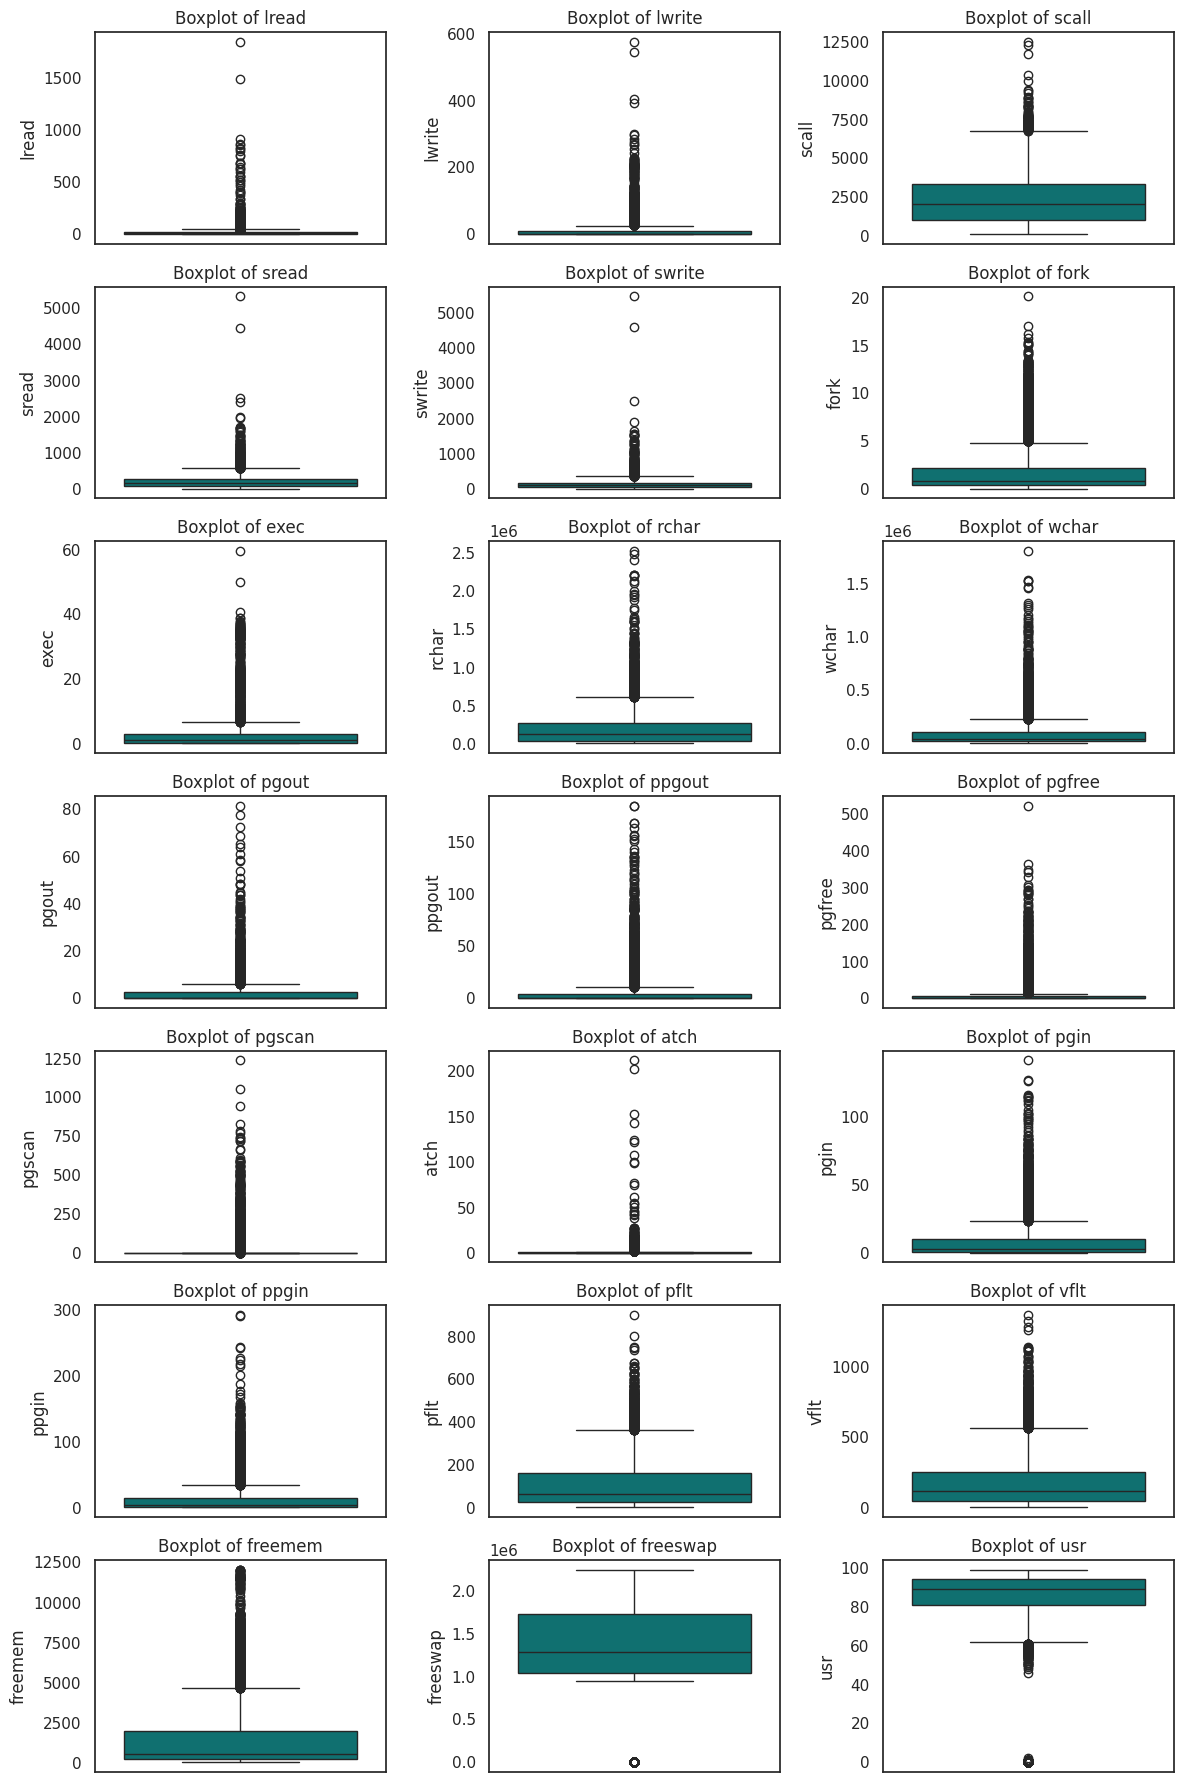

In [13]:
# Box Plot of Num cols
# Setting up the subplots
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(12, 18));

# Check for outliers in numerical columns
for i, col in enumerate(num_cols1):
    sns.boxplot(df1[col],ax=axes[i//3, i%3],orient='v', color='teal');
    axes[i//3, i%3].set_title(f'Boxplot of {col}');
    axes[i//3, i%3].tick_params(axis='x', rotation=0)

plt.tight_layout();

#### From the above box plots we can clearly see that there are outliers in all the numerical variables. But these need not to be outliers. We can check this further in the preprocessing stage

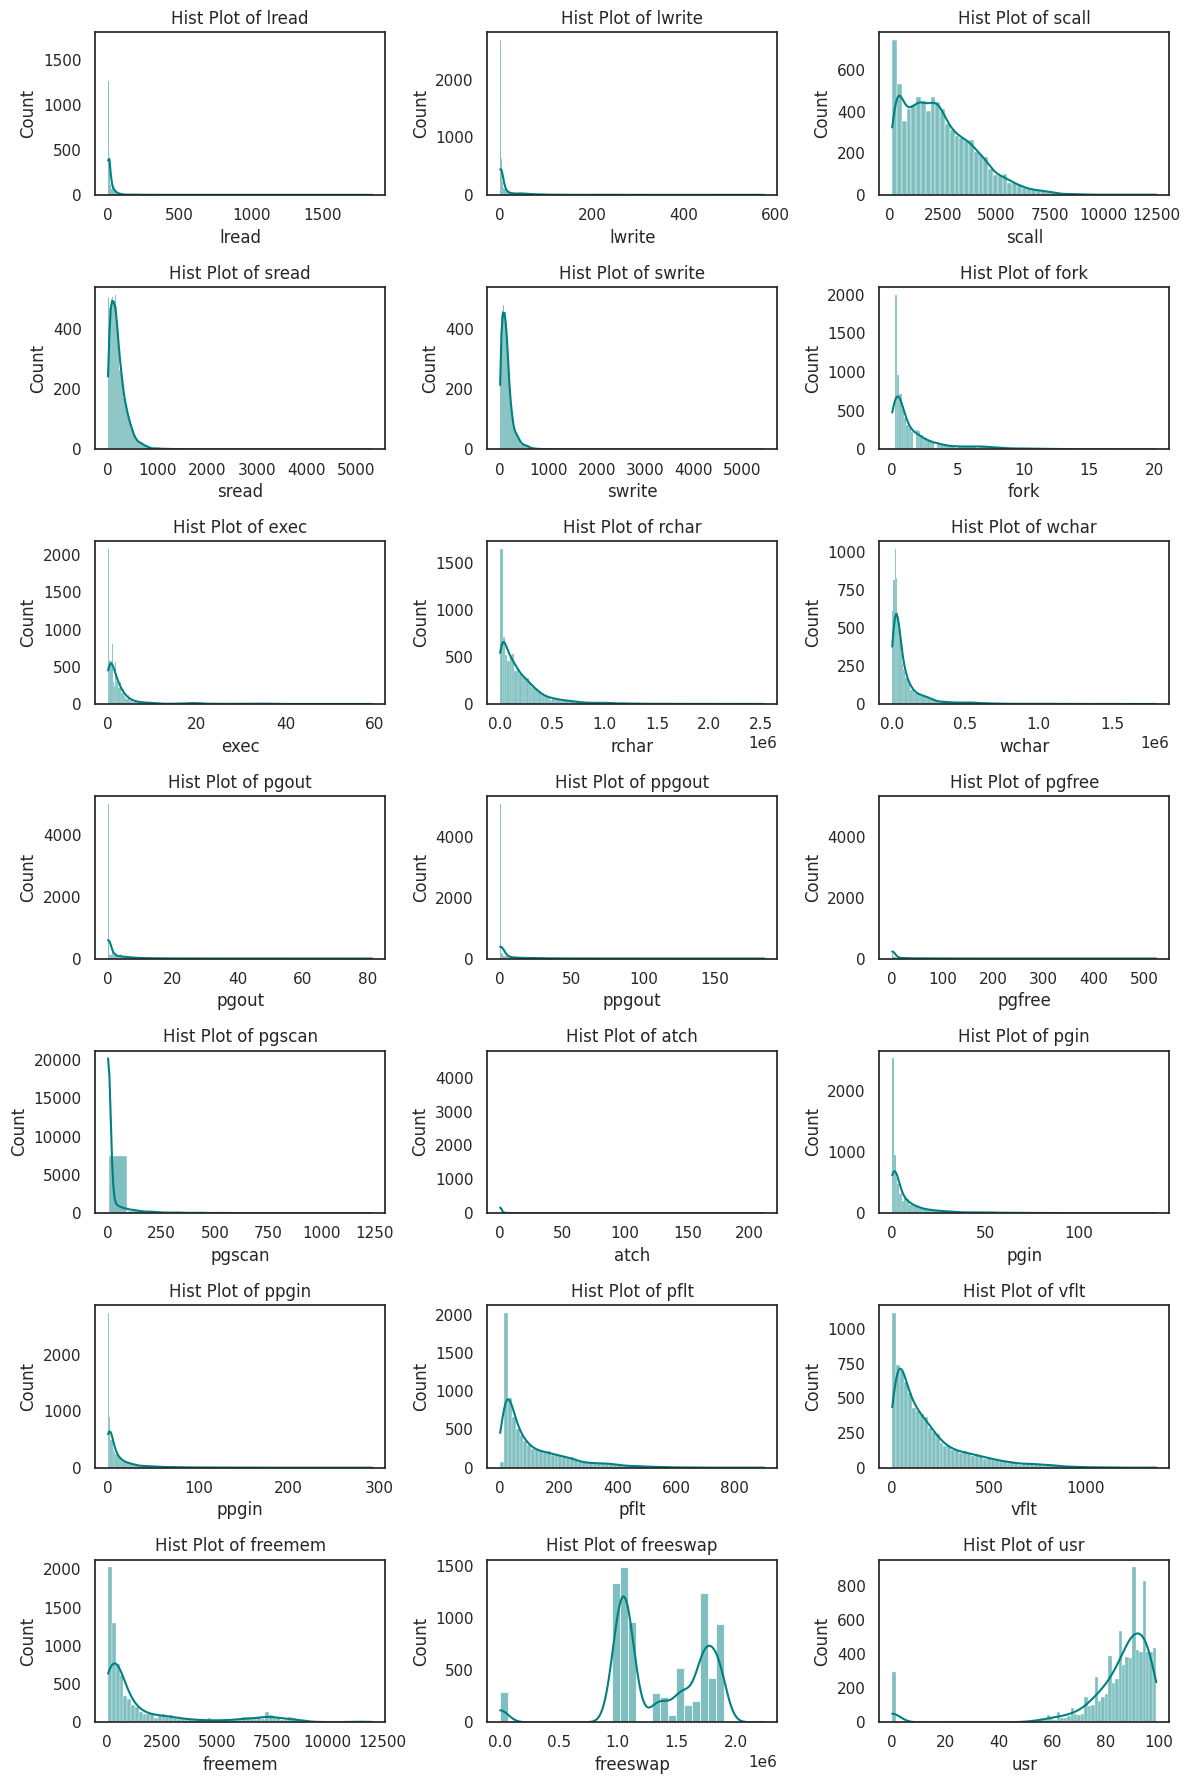

In [14]:
# Hist Plot of Num Cols
# Setting up the subplots
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(12, 18));

for i, col in enumerate(num_cols1):
    sns.histplot(df1[col],ax=axes[i//3, i%3], kde=True, color='teal');
    axes[i//3, i%3].set_title(f'Hist Plot of {col}');
    axes[i//3, i%3].tick_params(axis='x', rotation=0)

plt.tight_layout();

#### We can see that the data is mostly right skewed. Usr column is left skewed. The histogram of freeswap shows that the data is somewhat bimodal.

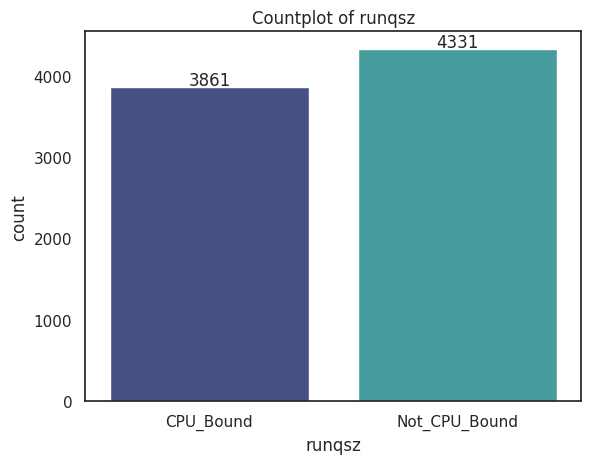

In [15]:
for col in cat_cols1:
    ax = sns.countplot(data=df1, x=col, palette='mako')
    plt.title(f'Countplot of {col}')

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 5),
                     textcoords = 'offset points')

plt.show()

### Bivariate Analysis

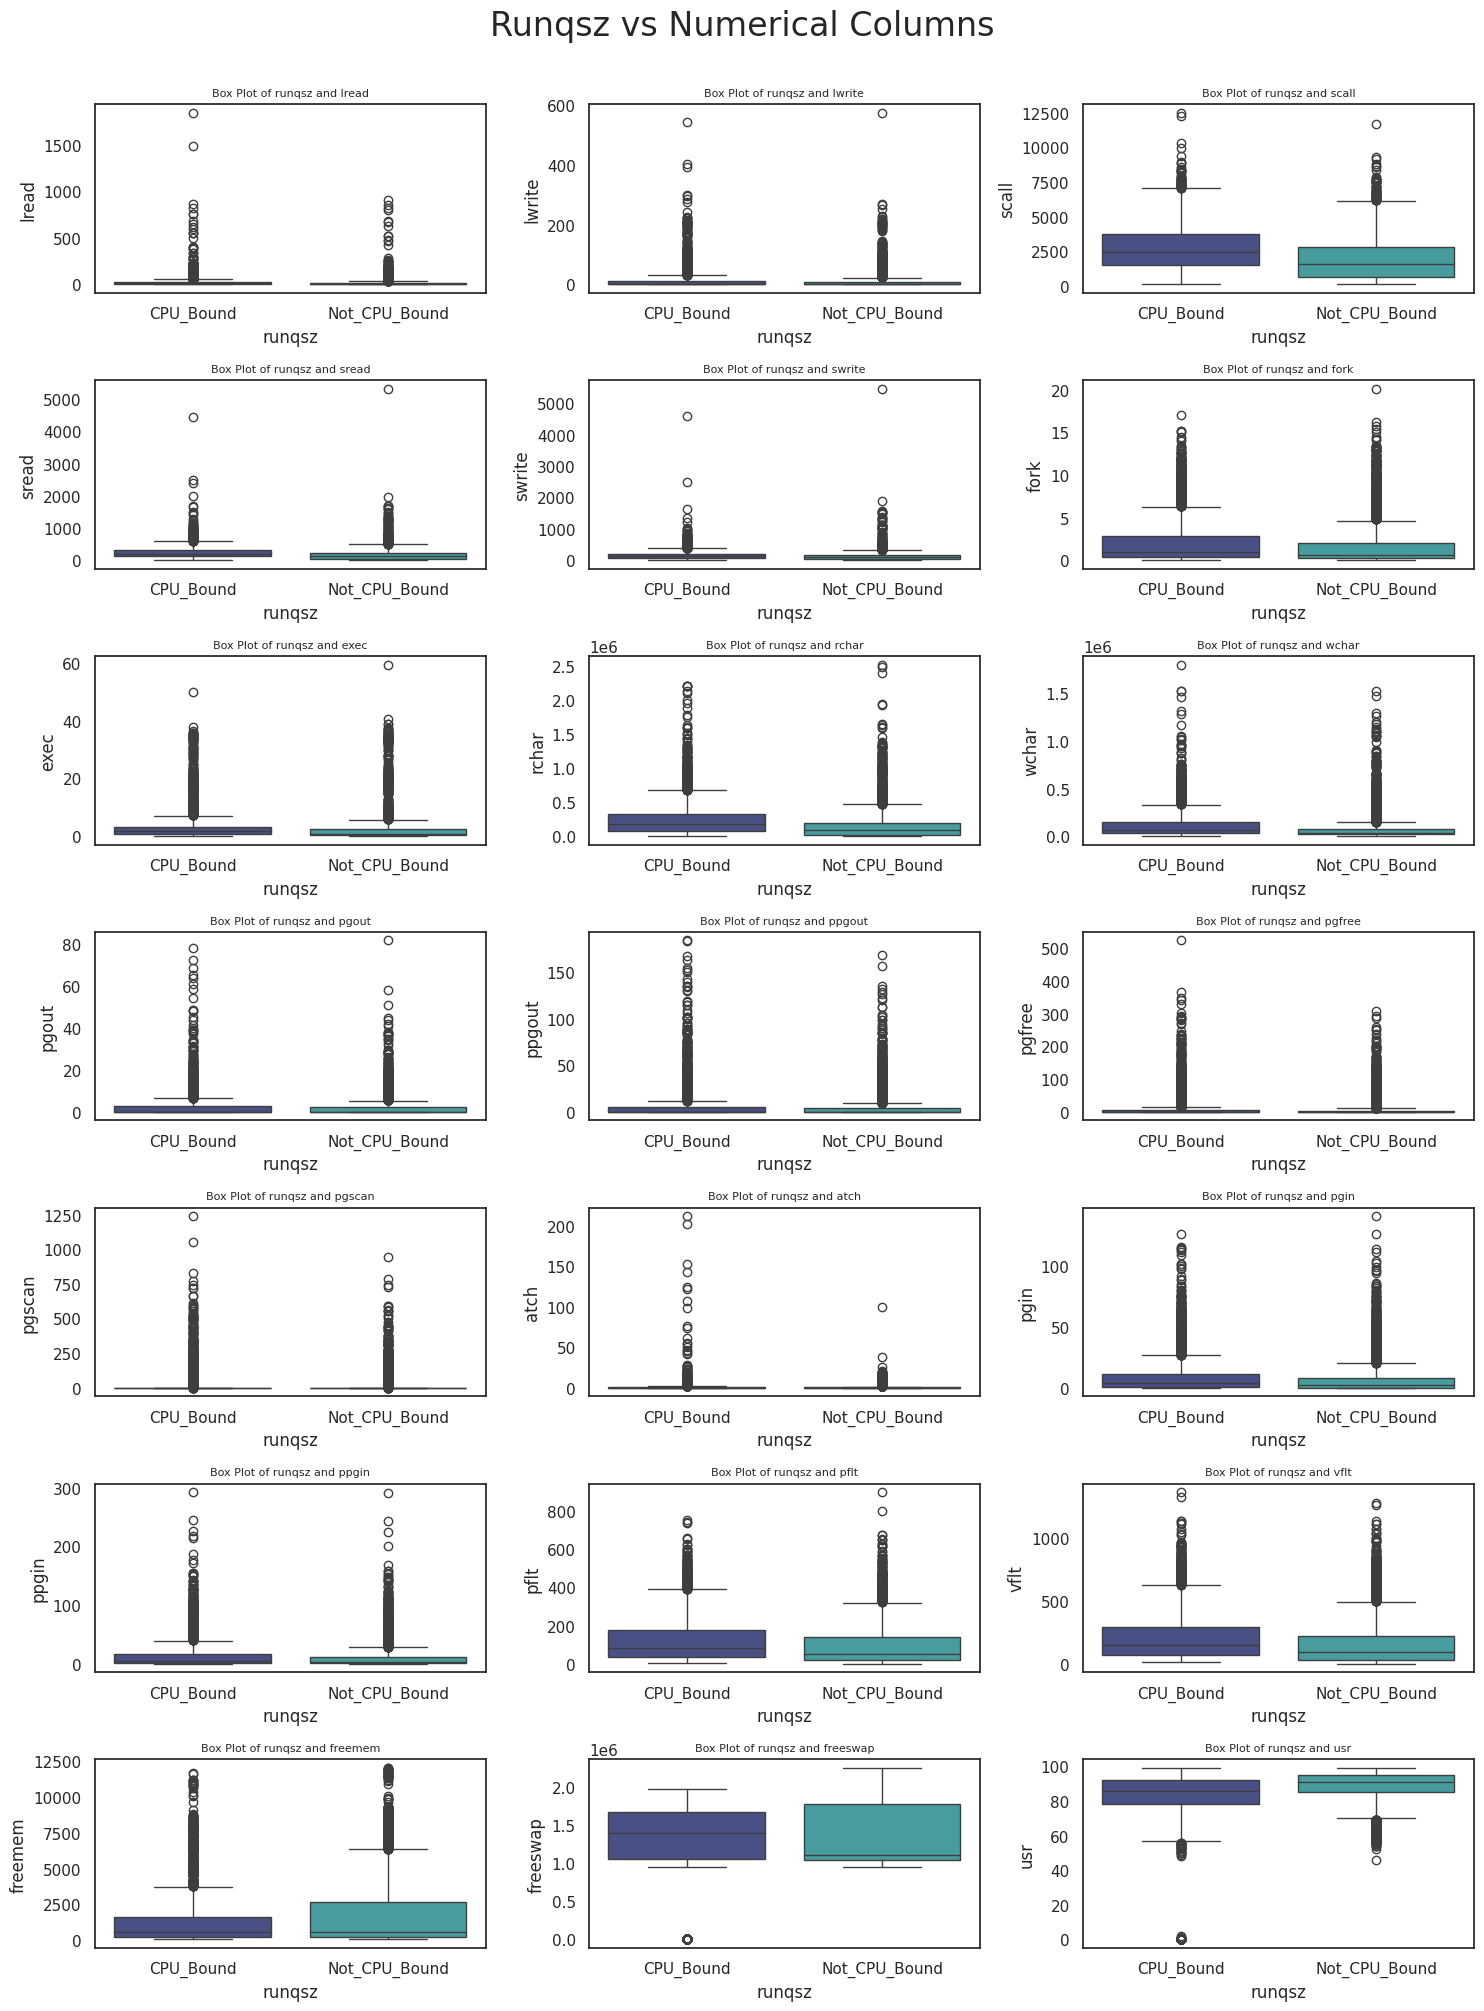

In [16]:
# Setting up the subplots
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15, 20));

# Bivariate analysis: Cat Col vs Numerical variables
for i, num_col in enumerate(num_cols1):
    sns.boxplot(x='runqsz', y=num_col, data=df1, palette='mako',ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Box Plot of runqsz and {num_col}',fontsize=8)
    # axes[i//3, i%3].tick_params(axis='x', rotation=35)
fig.suptitle('Runqsz vs Numerical Columns', fontsize=24,y=1.005);
plt.tight_layout();

In [17]:
df1[num_cols1.columns].corr()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,usr
lread,1.000000,0.533737,0.191377,0.132881,0.119953,0.140284,0.110965,0.107997,0.081353,0.082463,...,0.114438,0.087783,0.021563,0.189799,0.161345,0.137463,0.165539,-0.083214,-0.081293,-0.141394
lwrite,0.533737,1.000000,0.143404,0.128403,0.101524,0.052511,0.038237,0.114315,0.091388,0.067013,...,0.065692,0.042608,0.028310,0.091068,0.089011,0.067024,0.094965,-0.091133,-0.116478,-0.111213
scall,0.191377,0.143404,1.000000,0.696887,0.619984,0.446766,0.308999,0.349148,0.273796,0.194529,...,0.199778,0.177908,0.077969,0.241628,0.219070,0.481781,0.531760,-0.387520,-0.350629,-0.323188
sread,0.132881,0.128403,0.696887,1.000000,0.881069,0.416721,0.164084,0.499998,0.401427,0.193679,...,0.212911,0.194272,0.085468,0.207012,0.210225,0.452020,0.491045,-0.286437,-0.302036,-0.332160
swrite,0.119953,0.101524,0.619984,0.881069,1.000000,0.376876,0.103643,0.330156,0.393929,0.151371,...,0.145458,0.120180,0.061373,0.147000,0.144278,0.396580,0.416571,-0.248574,-0.237062,-0.272252
fork,0.140284,0.052511,0.446766,0.416721,0.376876,1.000000,0.763974,0.279594,0.060854,0.130192,...,0.168082,0.160839,0.047194,0.163468,0.132181,0.931040,0.939348,-0.123357,-0.130442,-0.363277
exec,0.110965,0.038237,0.308999,0.164084,0.103643,0.763974,1.000000,0.167630,0.000715,0.111465,...,0.146163,0.144855,0.052307,0.186099,0.149911,0.645239,0.691754,-0.158565,-0.153347,-0.288526
rchar,0.107997,0.114315,0.349148,0.499998,0.330156,0.279594,0.167630,1.000000,0.499569,0.210670,...,0.277018,0.258730,0.167091,0.298843,0.346676,0.311637,0.362042,-0.148509,-0.218712,-0.326262
wchar,0.081353,0.091388,0.273796,0.401427,0.393929,0.060854,0.000715,0.499569,1.000000,0.192361,...,0.158884,0.113368,0.181418,0.177501,0.200481,0.086193,0.111078,-0.148928,-0.225880,-0.289036
pgout,0.082463,0.067013,0.194529,0.193679,0.151371,0.130192,0.111465,0.210670,0.192361,1.000000,...,0.730381,0.553916,0.147759,0.385648,0.414865,0.151285,0.229129,-0.269687,-0.245378,-0.221877


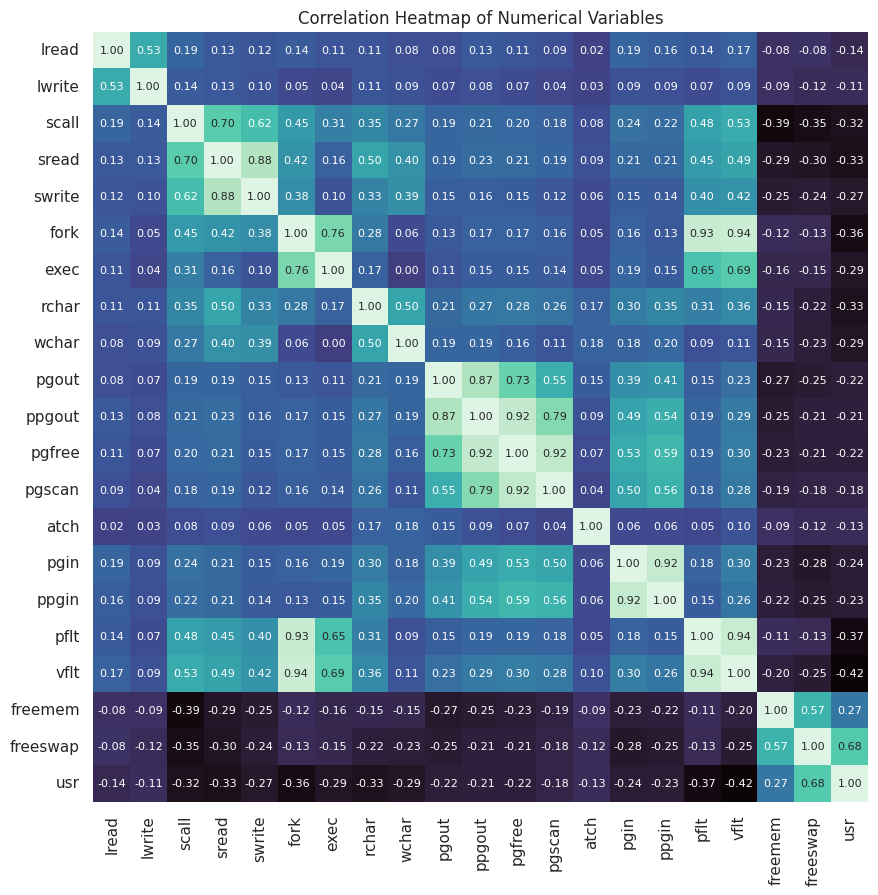

In [18]:
plt.figure(figsize=(10, 10));
sns.heatmap(df1[num_cols1.columns].corr(),cbar=False ,annot=True, fmt=".2f", cmap='mako',annot_kws={"size": 8})
plt.title('Correlation Heatmap of Numerical Variables');

### Problem 1 - Data Pre-processing
#### Prepare the data for modelling: - Missing Value Treatment (if needed) - Outlier Detection (treat, if needed) - Feature Engineering - Encode the data - Train-test split

In [19]:
df1.isnull().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

#### We have already treated the missing values before the univariate and bivariate analysis

In [20]:
df1[['rchar','wchar']]

,rchar,wchar
0,40671.0,53995.0
1,448.0,8385.0
2,125473.5,31950.0
3,125473.5,8670.0
4,125473.5,12185.0
...,...,...
8187,405250.0,85282.0
8188,89489.0,41764.0
8189,325948.0,52640.0
8190,62571.0,29505.0


#### From the univariate analysis box plots we can see that there are outliers in every numerical columns. From the statistical summary, we can see that there is a huge difference between the min and max values. So we will proceed with treating the outliers using upper and lower bound values.

In [21]:
def handle_outliers(data, columns):
    for col in columns:
        # Calculate the quartiles
        Q1 = np.percentile(data[col].values, 25)
        Q3 = np.percentile(data[col].values, 75)

        # Calculate the interquartile range (IQR)
        IQR = Q3 - Q1

        # Calculate the lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with lower or upper bound values
        data.loc[data[col] < lower_bound, col] = lower_bound
        data.loc[data[col] > upper_bound, col] = upper_bound

    return data

In [22]:
df1 = handle_outliers(df1, num_cols1)

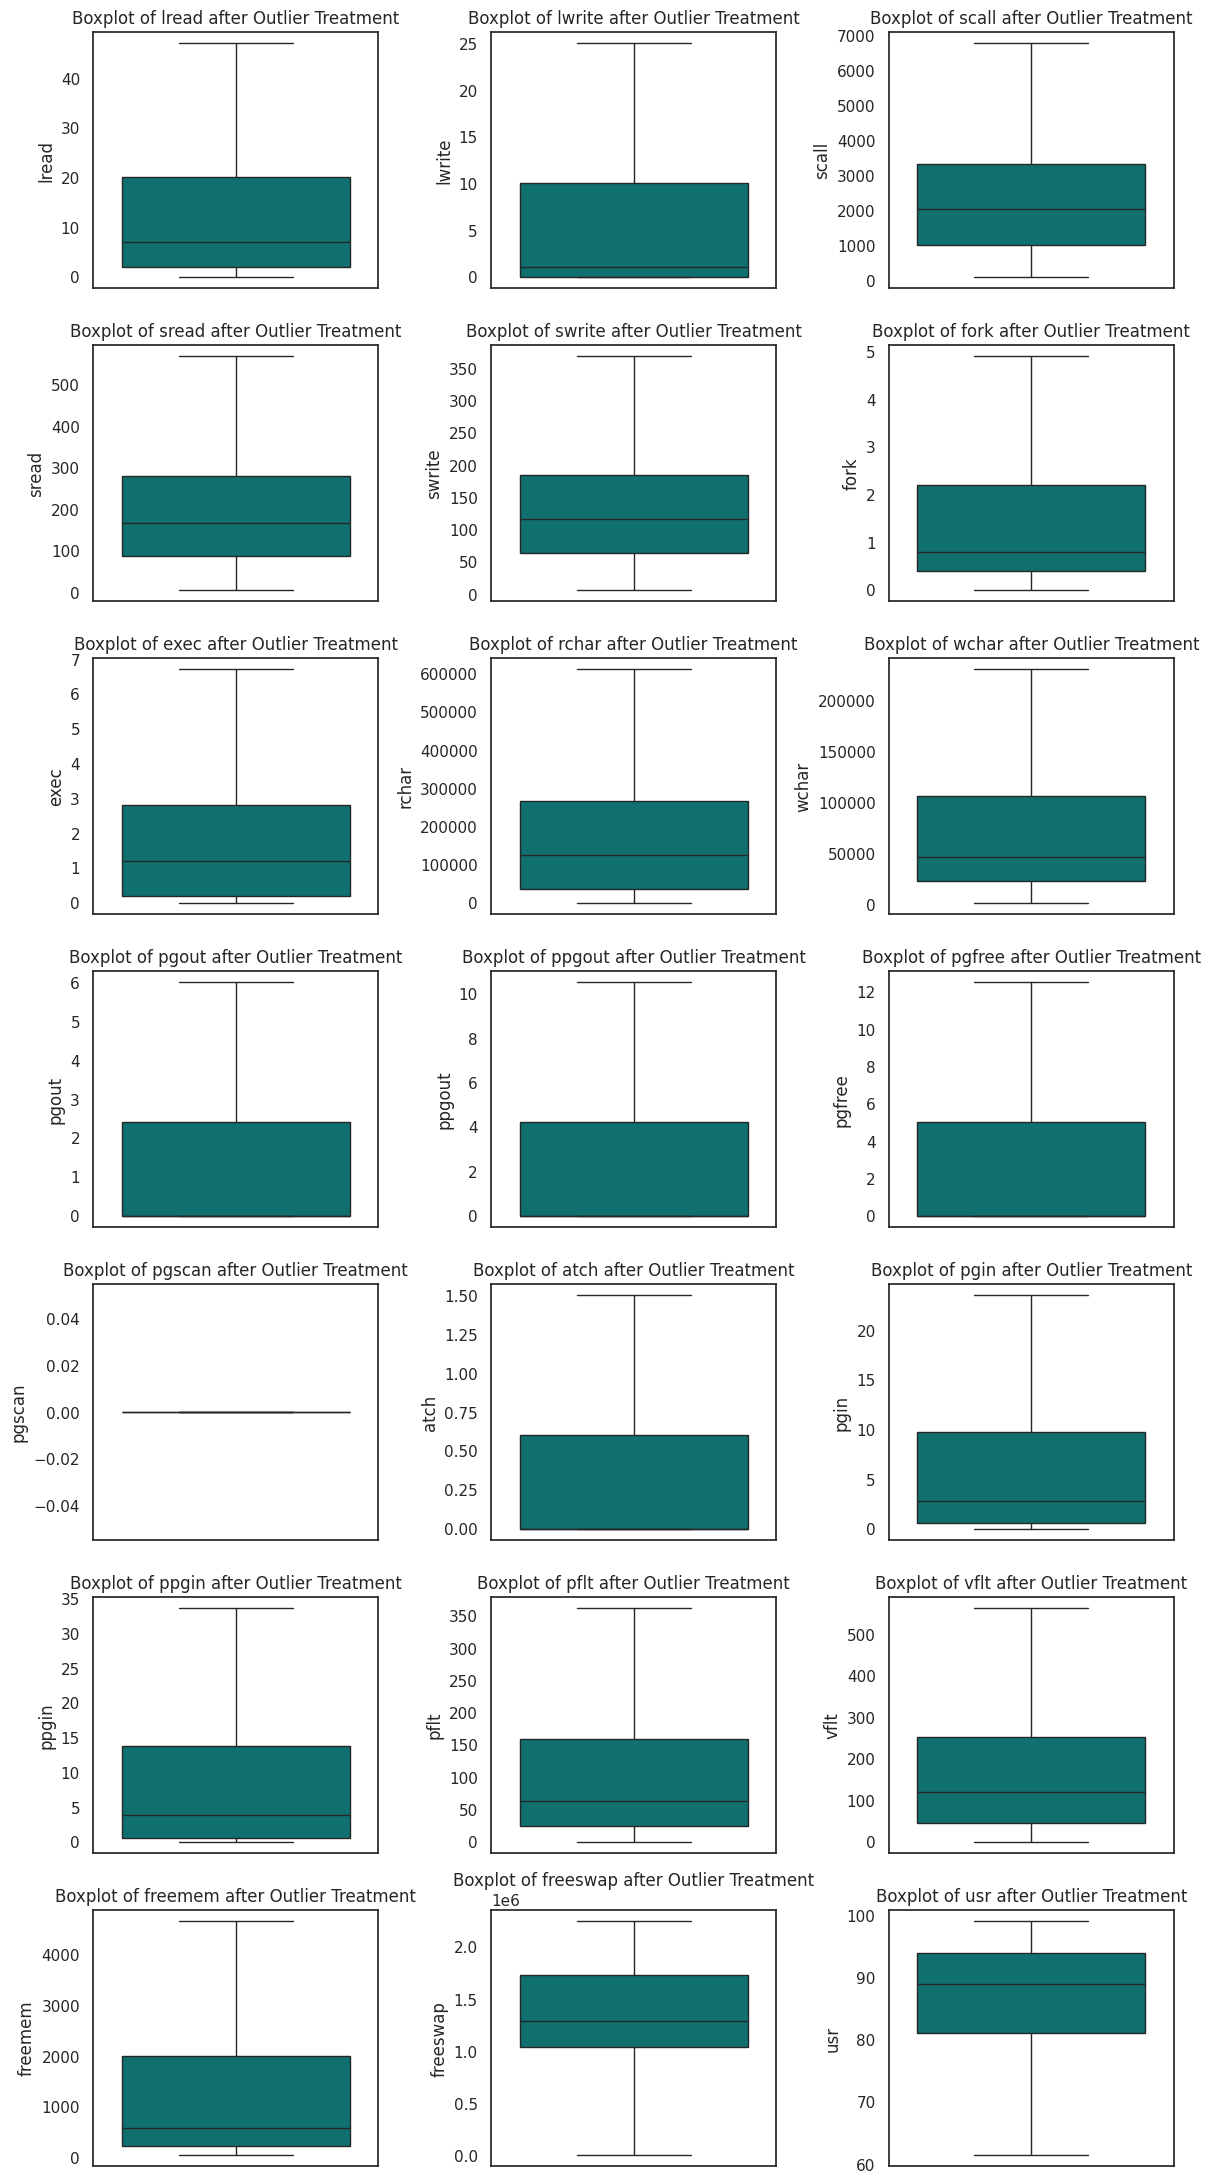

In [23]:
# Box Plot of Num cols
# Setting up the subplots
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(12, 22));

# Check for outliers in numerical columns
for i, col in enumerate(num_cols1):
    sns.boxplot(df1[col],ax=axes[i//3, i%3],orient='v', color='teal');
    axes[i//3, i%3].set_title(f'Boxplot of {col} after Outlier Treatment');
    axes[i//3, i%3].tick_params(axis='x', rotation=0)

plt.tight_layout();

#### We will now scale the data as we can see that there is quite a big difference between the min and max values between the variables

In [24]:
num_cols1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8192 non-null   float64
 8   wchar     8192 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  freemem   8192 non-null   int64  
 19  freeswap  8192 non-null   int64  
 20  usr       8192 non-null   int6

In [25]:
scaler1 = StandardScaler()
scaled_data1 = scaler1.fit_transform(df1.drop('runqsz',axis=1))

runqsz = df1['runqsz']
df1 = pd.DataFrame(scaled_data1, columns=df1.drop('runqsz',axis=1).columns, index=df1.drop('runqsz',axis=1).index)
df1.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,usr
0,-0.819513,-0.716521,-0.092583,-0.823008,-0.720331,-0.853341,-0.853740,-0.791696,-0.303831,-0.64583,...,-0.635071,0.0,-0.689780,-0.622761,-0.586048,-0.882744,-0.918365,2.037473,0.956433,0.898009
1,-0.885482,-0.716521,-1.333640,-1.238681,-1.204189,-0.853341,-0.853740,-1.022096,-0.943894,-0.64583,...,-0.635071,0.0,-0.689780,-0.830987,-0.819018,-0.886387,-0.977262,2.037473,1.284547,1.103180
2,0.104042,-0.393641,-0.083166,-0.277863,-0.195293,0.277935,0.231003,-0.305940,-0.613197,-0.64583,...,-0.635071,0.0,1.442029,-0.050138,0.023258,0.438869,0.274345,-0.427003,-0.730310,0.077327
3,-0.885482,-0.716521,-1.339918,-1.279567,-1.255663,-0.853341,-0.853740,-0.305940,-0.939894,-0.64583,...,-0.635071,0.0,-0.689780,-0.804959,-0.801097,-0.886683,-0.977446,2.037473,1.271955,1.205765
4,-0.555640,-0.608895,-1.233200,-1.095580,-1.029176,-0.727644,-0.755127,-0.305940,-0.890567,-0.64583,...,-0.635071,0.0,-0.689780,-0.700845,-0.711493,-0.668055,-0.787893,-0.469976,1.026087,0.385083


#### We will now proceed with encoding the object column using One Hot encoder

In [26]:
df1['runqsz'] = pd.get_dummies(runqsz, drop_first=True, dtype=int)
df1.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,usr,runqsz
0,-0.819513,-0.716521,-0.092583,-0.823008,-0.720331,-0.853341,-0.853740,-0.791696,-0.303831,-0.64583,...,0.0,-0.689780,-0.622761,-0.586048,-0.882744,-0.918365,2.037473,0.956433,0.898009,0
1,-0.885482,-0.716521,-1.333640,-1.238681,-1.204189,-0.853341,-0.853740,-1.022096,-0.943894,-0.64583,...,0.0,-0.689780,-0.830987,-0.819018,-0.886387,-0.977262,2.037473,1.284547,1.103180,1
2,0.104042,-0.393641,-0.083166,-0.277863,-0.195293,0.277935,0.231003,-0.305940,-0.613197,-0.64583,...,0.0,1.442029,-0.050138,0.023258,0.438869,0.274345,-0.427003,-0.730310,0.077327,1
3,-0.885482,-0.716521,-1.339918,-1.279567,-1.255663,-0.853341,-0.853740,-0.305940,-0.939894,-0.64583,...,0.0,-0.689780,-0.804959,-0.801097,-0.886683,-0.977446,2.037473,1.271955,1.205765,1
4,-0.555640,-0.608895,-1.233200,-1.095580,-1.029176,-0.727644,-0.755127,-0.305940,-0.890567,-0.64583,...,0.0,-0.689780,-0.700845,-0.711493,-0.668055,-0.787893,-0.469976,1.026087,0.385083,1


#### We will now split the data into train and test using Train Test Split

In [27]:
X = df1.drop('usr', axis = 1)
y = df1['usr']

## Problem 1- Model Building - Linear regression
#### - Apply linear Regression using Sklearn - Using Statsmodels Perform checks for significant variables using the appropriate method - Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare

#### We will first create a Linear Model using Sklearn Library

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

In [29]:
linear_regression_sklearn = LinearRegression()
linear_regression_sklearn.fit(X_train, y_train)

LinearRegression()

In [30]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, linear_regression_sklearn.coef_[idx]))

# Let us check the intercept for the model
intercept = linear_regression_sklearn.intercept_
print("The intercept for our model is {}".format(intercept))

The coefficient for lread is -0.08460826809123453
The coefficient for lwrite is 0.047589631865369575
The coefficient for scall is -0.10413083080605508
The coefficient for sread is 0.02206458259442326
The coefficient for swrite is -0.057585543016453085
The coefficient for fork is -0.00498977468250233
The coefficient for exec is -0.06291670940806966
The coefficient for rchar is -0.09486199147658808
The coefficient for wchar is -0.03700170460215382
The coefficient for pgout is -0.10779345353598814
The coefficient for ppgout is 0.004844162794078043
The coefficient for pgfree is 0.028833325581934247
The coefficient for pgscan is -5.551115123125783e-17
The coefficient for atch is 0.037416821546987104
The coefficient for pgin is -0.0002232580056914965
The coefficient for ppgin is -0.06407974761731816
The coefficient for pflt is -0.34217223748235037
The coefficient for vflt is -0.09822580894664304
The coefficient for freemem is -0.07866424388612288
The coefficient for freeswap is 0.39629101569

In [31]:
# R square for Linear Regression Data
skl_accuracy1 = linear_regression_sklearn.score(X_train,y_train)
skl_accuracy2 = linear_regression_sklearn.score(X_test,y_test)

prediction_on_training_data = linear_regression_sklearn.predict(X_train)
prediction_on_test_data = linear_regression_sklearn.predict(X_test)

skl_rmse1 = np.sqrt(mean_squared_error(y_train,prediction_on_training_data))
skl_rmse2 = np.sqrt(mean_squared_error(y_test,prediction_on_test_data))

skl_mae1 = mean_absolute_error(y_train, prediction_on_training_data)
skl_mae2 = mean_absolute_error(y_test, prediction_on_test_data)

print(f'R Square on training data is {skl_accuracy1}')
print(f'R Square on test data is {skl_accuracy2}')

print(f'RMSE on training data is {skl_rmse1}')
print(f'RMSE on test data is {skl_rmse2}')

print(f'MAE on training data is {skl_mae1}')
print(f'MAE on test data is {skl_mae2}')

R Square on training data is 0.7883733273531547
R Square on test data is 0.7876764031972971
RMSE on training data is 0.45995585455522037
RMSE on test data is 0.46095644915759637
MAE on training data is 0.3428439272496033
MAE on test data is 0.34073671695817337


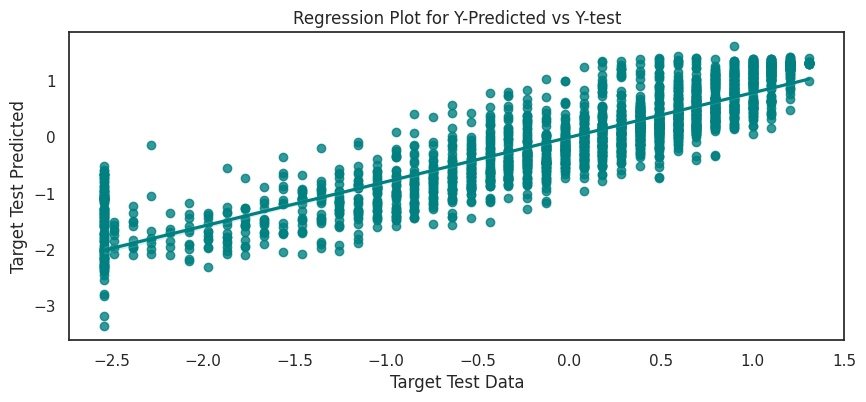

In [32]:
plt.figure(figsize=(10,4))
sns.regplot(x=y_test,y=prediction_on_test_data, color='teal')
plt.title("Regression Plot for Y-Predicted vs Y-test");
plt.xlabel("Target Test Data")
plt.ylabel("Target Test Predicted")
plt.show()

#### Linear Equation of Linear Regression using SkLearn

In [33]:
intercept = linear_regression_sklearn.intercept_
for idx, col_name in enumerate(X_train.columns):
    if idx == 0:
        print(f'usr = {intercept}', end='+ ')
    print(f'{round(linear_regression_sklearn.coef_[idx],7)}*({col_name})', end='+ ')

usr = -0.09592023749931165+ -0.0846083*(lread)+ 0.0475896*(lwrite)+ -0.1041308*(scall)+ 0.0220646*(sread)+ -0.0575855*(swrite)+ -0.0049898*(fork)+ -0.0629167*(exec)+ -0.094862*(rchar)+ -0.0370017*(wchar)+ -0.1077935*(pgout)+ 0.0048442*(ppgout)+ 0.0288333*(pgfree)+ -0.0*(pgscan)+ 0.0374168*(atch)+ -0.0002233*(pgin)+ -0.0640797*(ppgin)+ -0.3421722*(pflt)+ -0.0982258*(vflt)+ -0.0786642*(freemem)+ 0.396291*(freeswap)+ 0.1803818*(runqsz)+ 

#### We will now create a model with Statsmodels

In [34]:
# let's add the intercept to data
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [35]:
linear_regression_sm = sm.OLS(y_train, X_train)
linear_regression_sm_res = linear_regression_sm.fit()

In [36]:
print(linear_regression_sm_res.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1115.
Date:                Sun, 12 May 2024   Prob (F-statistic):               0.00
Time:                        14:19:56   Log-Likelihood:                -3600.4
No. Observations:                5734   AIC:                             7243.
Df Residuals:                    5713   BIC:                             7383.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0905      0.009     -9.935      0.0

In [37]:
prediction_on_training_data = linear_regression_sm_res.predict(X_train)
print(f'RMSE on training data is {np.sqrt(mean_squared_error(y_train,prediction_on_training_data))}')

prediction_on_test_data = linear_regression_sm_res.predict(X_test)
print(f'RMSE on test data is {np.sqrt(mean_squared_error(y_test,prediction_on_test_data))}')

RMSE on training data is 0.45337923791490436
RMSE on test data is 0.4772569420288292


In [38]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const        2.306731
lread        5.350560
lwrite       4.328397
scall        2.960609
sread        6.420172
swrite       5.597135
fork        13.035359
exec         3.241417
rchar        2.133616
wchar        1.584381
pgout       11.360363
ppgout      29.404223
pgfree      16.496748
pgscan            NaN
atch         1.875901
pgin        13.809339
ppgin       13.951855
pflt        12.001460
vflt        15.971049
freemem      1.961304
freeswap     1.841239
runqsz       1.156815
dtype: float64



##### The VIF values indicate that the features fork, pgout, ppgout, pgfree, pgin, ppgin, pflt and vflt are correlated with one or more independent features. Since pgscan doesn't have any non-zero values, we can remove it and check the performance of models.

In [39]:
X_train2 = X_train.drop('pgscan',axis=1)
X_test2 = X_test.drop('pgscan',axis=1)

ols_model2 = sm.OLS(y_train,X_train2).fit()

prediction_on_training_data = ols_model2.predict(X_train2)
prediction_on_test_data = ols_model2.predict(X_test2)

r2_train2 = r2_score(y_train, prediction_on_training_data)
r2_test2 = r2_score(y_test, prediction_on_test_data)

print('Training:-')
print(f'RMSE on training data is {np.sqrt(mean_squared_error(y_train,prediction_on_training_data))}')
print("R-squared:", r2_train2)
print('\nTesting:-')
print(f'RMSE on test data is {np.sqrt(mean_squared_error(y_test,prediction_on_test_data))}')
print("R-squared:", r2_test2)

Training:-
RMSE on training data is 0.4533792379149044
R-squared: 0.796108610127457

Testing:-
RMSE on test data is 0.47725694202882907
R-squared: 0.7677318597936168


In [40]:
print(ols_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1115.
Date:                Sun, 12 May 2024   Prob (F-statistic):               0.00
Time:                        14:19:56   Log-Likelihood:                -3600.4
No. Observations:                5734   AIC:                             7243.
Df Residuals:                    5713   BIC:                             7383.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0905      0.009     -9.935      0.0

#### On dropping 'pgscan' adj. R-squared remains the same.

#### Now we will proceed with dropping the page variables "pgin","ppgin","pgout","ppgout" as they are highly correlated to each other and we can verify this from the heatmap

In [41]:
X_train3 = X_train2.drop(["pgin","ppgin","pgout","ppgout"], axis=1)
X_test3 = X_test2.drop(["pgin","ppgin","pgout","ppgout"], axis=1)

ols_model3 = sm.OLS(y_train, X_train3).fit()

prediction_on_training_data = ols_model3.predict(X_train3)
prediction_on_test_data = ols_model3.predict(X_test3)

r2_train3 = r2_score(y_train, prediction_on_training_data)
r2_test3 = r2_score(y_test, prediction_on_test_data)

print('Training:-')
print(f'RMSE on training data is {np.sqrt(mean_squared_error(y_train,prediction_on_training_data))}')
print("R-squared:", r2_train3)
print('\nTesting:-')
print(f'RMSE on test data is {np.sqrt(mean_squared_error(y_test,prediction_on_test_data))}')
print("R-squared:", r2_test3)

Training:-
RMSE on training data is 0.4575258723060084
R-squared: 0.7923619481421293

Testing:-
RMSE on test data is 0.4815653552134727
R-squared: 0.763519353087679


In [42]:
print(ols_model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     1364.
Date:                Sun, 12 May 2024   Prob (F-statistic):               0.00
Time:                        14:19:56   Log-Likelihood:                -3652.7
No. Observations:                5734   AIC:                             7339.
Df Residuals:                    5717   BIC:                             7452.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0858      0.009     -9.347      0.0

#### From the above summary we can see that "sread","fork" columns have high p values greater than 0.05. So we will proceed with dropping them

In [43]:
X_train4 = X_train3.drop(["sread","fork"], axis=1)
X_test4 = X_test3.drop(["sread","fork"], axis=1)

ols_model4 = sm.OLS(y_train, X_train4).fit()

prediction_on_training_data = ols_model4.predict(X_train4)
prediction_on_test_data = ols_model4.predict(X_test4)

r2_train4 = r2_score(y_train, prediction_on_training_data)
r2_test4 = r2_score(y_test, prediction_on_test_data)

print('Training:-')
print(f'RMSE on training data is {np.sqrt(mean_squared_error(y_train,prediction_on_training_data))}')
print("R-squared:", r2_train4)
print('\nTesting:-')
print(f'RMSE on test data is {np.sqrt(mean_squared_error(y_test,prediction_on_test_data))}')
print("R-squared:", r2_test4)

Training:-
RMSE on training data is 0.4576537080153632
R-squared: 0.7922459010834746

Testing:-
RMSE on test data is 0.48163274178298915
R-squared: 0.7634531658741088


In [44]:
print(ols_model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     1558.
Date:                Sun, 12 May 2024   Prob (F-statistic):               0.00
Time:                        14:19:56   Log-Likelihood:                -3654.3
No. Observations:                5734   AIC:                             7339.
Df Residuals:                    5719   BIC:                             7438.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0859      0.009     -9.360      0.0

In [45]:
# let's check the VIF of the predictors
vif_series4 = pd.Series(
    [variance_inflation_factor(X_train4.values, i) for i in range(X_train4.shape[1])],
    index=X_train4.columns,
)
print("VIF values: \n\n{}\n".format(vif_series4))

VIF values: 

const        2.299597
lread        5.202090
lwrite       4.236100
scall        2.653110
swrite       3.093484
exec         2.961891
rchar        1.668198
wchar        1.557147
pgfree       1.814947
atch         1.736401
pflt         9.617778
vflt        11.397922
freemem      1.951286
freeswap     1.779452
runqsz       1.151110
dtype: float64



#### Since VIF for vflt is very high we can proceed with removing that

In [46]:
X_train5 = X_train4.drop(["vflt"], axis=1) ##,"vflt"pflt
X_test5 = X_test4.drop(["vflt"], axis=1)

ols_model5 = sm.OLS(y_train, X_train5).fit()

prediction_on_training_data = ols_model5.predict(X_train5)
prediction_on_test_data = ols_model5.predict(X_test5)

r2_train5 = r2_score(y_train, prediction_on_training_data)
r2_test5 = r2_score(y_test, prediction_on_test_data)

print('Training:-')
print(f'RMSE on training data is {np.sqrt(mean_squared_error(y_train,prediction_on_training_data))}')
print("R-squared:", r2_train5)
print('\nTesting:-')
print(f'RMSE on test data is {np.sqrt(mean_squared_error(y_test,prediction_on_test_data))}')
print("R-squared:", r2_test5)

Training:-
RMSE on training data is 0.45921545051538043
R-squared: 0.7908255607387231

Testing:-
RMSE on test data is 0.48419254829437863
R-squared: 0.7609320613792832


In [47]:
print(ols_model5.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     1664.
Date:                Sun, 12 May 2024   Prob (F-statistic):               0.00
Time:                        14:19:56   Log-Likelihood:                -3673.8
No. Observations:                5734   AIC:                             7376.
Df Residuals:                    5720   BIC:                             7469.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0854      0.009     -9.276      0.0

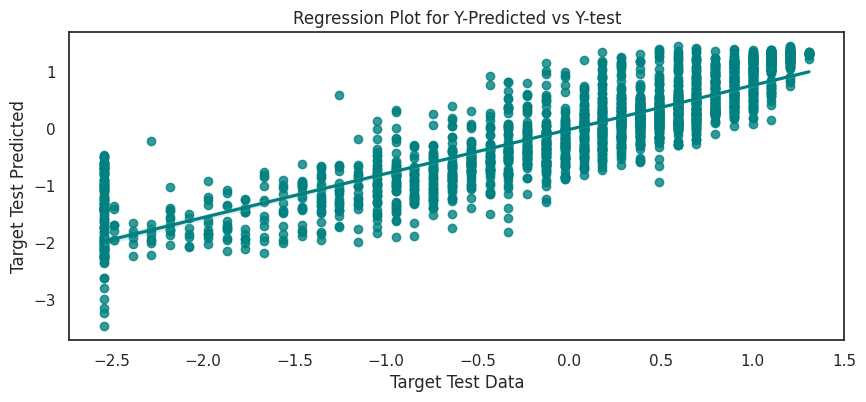

In [48]:
plt.figure(figsize=(10,4))
sns.regplot(x=y_test,y=prediction_on_test_data, color='teal')
plt.title("Regression Plot for Y-Predicted vs Y-test");
plt.xlabel("Target Test Data")
plt.ylabel("Target Test Predicted")
plt.show()

In [49]:
# let's check the VIF of the predictors
vif_series5 = pd.Series(
    [variance_inflation_factor(X_train5.values, i) for i in range(X_train5.shape[1])],
    index=X_train5.columns,
)
print("VIF values: \n\n{}\n".format(vif_series5))

VIF values: 

const       2.299429
lread       5.132697
lwrite      4.210329
scall       2.652093
swrite      3.012500
exec        2.827150
rchar       1.629358
wchar       1.530348
pgfree      1.773083
atch        1.732355
pflt        3.415993
freemem     1.947978
freeswap    1.726586
runqsz      1.150556
dtype: float64



#### VIF for all the features is less than 5 except lread. It means that we have reduced strong collinearity in the model. Also vif is based on business decisions
#### There are no features with p-value greater than 0.05
#### There seems to be no major improvement in the R Square and RMSE values after removing the not so significant variables.
#### It would be better to go with the SKlearn model for prediction and Statsmodel model for interpretation and understand which variables are playing a major role in the model.

#### Linear Equation of Linear Regression using Statsmodels

In [50]:
for idx, values in np.array(ols_model5.params.reset_index()):
    if idx == 'const':
        print(f'usr = {values}', end=' ')
    else:
        print(f'+ {round(values,7)}*({idx})', end=' ')

usr = -0.08540283890881983 + -0.1251862*(lread) + 0.0637883*(lwrite) + -0.1124736*(scall) + -0.0580753*(swrite) + -0.0801422*(exec) + -0.1085651*(rchar) + -0.040479*(wchar) + -0.0796952*(pgfree) + 0.0220477*(atch) + -0.4073339*(pflt) + -0.0770556*(freemem) + 0.3961317*(freeswap) + 0.1560367*(runqsz) 

### Testing the Assumptions of Linear Regression

##### For Linear Regression, we need to check if the following assumptions hold:-
##### Linearity
##### Independence
##### Homoscedasticity
##### Normality of error terms
##### No strong Multicollinearity

#### Linearity and Independence of predictors

In [51]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = ols_model5.fittedvalues.values  # predicted values
df_pred["Residuals"] = ols_model5.resid.values  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,0.487668,0.275172,0.212496
1,0.795424,0.544637,0.250787
2,-2.538597,-1.213578,-1.325019
3,-0.333014,-0.581005,0.247991
4,0.795424,1.233746,-0.438322


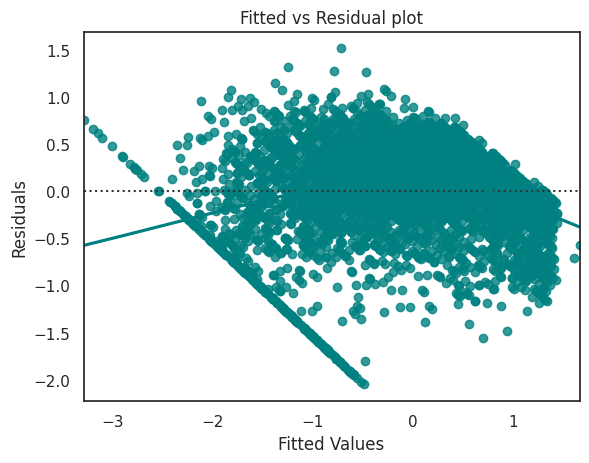

In [52]:
# let us plot the fitted values vs residuals
# sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="teal", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

##### No pattern in the data thus the assumption of linearity and independence of predictors satisfied

#### Test for Normality

In [53]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9482387900352478, pvalue=6.246007645035007e-41)

##### Since p-value < 0.05, the residuals are not normal as per shapiro test.

#### Test for Homoscedasticity

In [54]:
import statsmodels.stats.api as sms
sms.het_goldfeldquandt(df_pred["Residuals"], X_train5)[1]

0.0033147490129341256

##### Since p-value > 0.05 we can say that the residuals are not homoscedastic.

### Problem 1 - Business Insights & Recommendations
####  Comment on the Linear Regression equation from the final model and impact of relevant variables (atleast 2) as per the equation - Conclude with the key takeaways (actionable insights and recommendations) for the business

#### Monitoring memory (freemem) and swap space (freeswap) helps prevent system crashes.
#### Active user presence (usr metric) is crucial for maintaining system responsiveness.
#### Linear regression models suggest 'runqsz' and 'fork' as influential factors on 'usr'.
#### Monitor system call counts and I/O operations for performance optimization.
#### 'lread', 'lwrite', 'scall', 'sread', 'swrite', 'rchar', 'wchar', 'pgout', 'ppgout', 'pgscan', 'freemem', 'freeswap': These coefficients have negligible values close to zero, indicating that they have little impact on the 'usr' metric.
#### 'fork', 'exec', 'pgfree', 'pgin', 'ppgin', 'pflt', 'vflt': These coefficients have small values indicating a relatively small impact on the 'usr' metric.
#### 'atch': This coefficient has a larger positive value, suggesting that an increase in 'atch' leads to a corresponding increase in the 'usr' metric.
#### 'runqsz': This coefficient has a relatively large positive value, indicating that the 'usr' metric is positively influenced by the 'runqsz' (process run queue size) variable.

# Problem 2
#### In your role as a statistician at the Republic of Indonesia Ministry of Health, you have been entrusted with a dataset containing information from a Contraceptive Prevalence Survey. This dataset encompasses data from 1473 married females who were either not pregnant or were uncertain of their pregnancy status during the survey.

#### Your task involves predicting whether these women opt for a contraceptive method of choice. This prediction will be based on a comprehensive analysis of their demographic and socio-economic attributes.

### Problem 2 - Define the problem and perform exploratory Data Analysis
####  Problem definition - Check shape, Data types, statistical summary - Univariate analysis - Multivariate analysis - Use appropriate visualizations to identify the patterns and insights - Key meaningful observations on individual variables and the relationship between variables

In [55]:
df2 = pd.read_excel('/content/Data 2 - Contraceptive.xlsx')
df2.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [56]:
df2.shape

(1473, 10)

In [57]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [58]:
df2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Wife_age,1402.0,NaN,NaN,NaN,32.606277,8.274927,16.0,26.0,32.0,39.0,49.0
Wife_ education,1473,4,Tertiary,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Husband_education,1473,4,Tertiary,899,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_children_born,1452.0,NaN,NaN,NaN,3.254132,2.365212,0.0,1.0,3.0,4.0,16.0
Wife_religion,1473,2,Scientology,1253,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wife_Working,1473,2,No,1104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Husband_Occupation,1473.0,NaN,NaN,NaN,2.137814,0.864857,1.0,1.0,2.0,3.0,4.0
Standard_of_living_index,1473,4,Very High,684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Media_exposure,1473,2,Exposed,1364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contraceptive_method_used,1473,2,Yes,844,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df2.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [60]:
df2.duplicated().sum()

80

#### We will impute the missing values with median as the data is skewed also it is necessary to treat the missing values before EDA

In [61]:
df2['Wife_age'].fillna(df2['Wife_age'].median(), inplace=True)
df2['No_of_children_born'].fillna(df2['No_of_children_born'].median(), inplace=True)

df2.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

#### We can see that there are null values in Wife_age and No_of_children_born columns. And also we can see that there are 80 duplicates in the dataset.

In [62]:
num_cols2 = df2.select_dtypes(include=['float64', 'int64'])
cat_cols2 = df2.select_dtypes(include='object')

In [63]:
print(len(num_cols2.columns),len(cat_cols2.columns))

3 7


In [64]:
for i in cat_cols2:
    print('\n',df2[i].value_counts())


 Wife_ education
Tertiary      577
Secondary     410
Primary       334
Uneducated    152
Name: count, dtype: int64

 Husband_education
Tertiary      899
Secondary     352
Primary       178
Uneducated     44
Name: count, dtype: int64

 Wife_religion
Scientology        1253
Non-Scientology     220
Name: count, dtype: int64

 Wife_Working
No     1104
Yes     369
Name: count, dtype: int64

 Standard_of_living_index
Very High    684
High         431
Low          229
Very Low     129
Name: count, dtype: int64

 Media_exposure 
Exposed        1364
Not-Exposed     109
Name: count, dtype: int64

 Contraceptive_method_used
Yes    844
No     629
Name: count, dtype: int64


## Univariate Analysis of Numerical and Categorical Variables

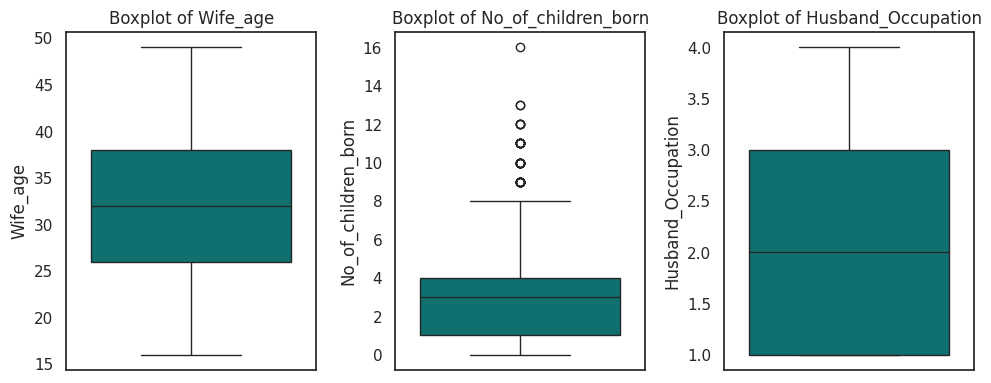

In [65]:
# Box Plot of Num cols
# Setting up the subplots
fig, axes = plt.subplots(nrows=1, ncols=len(num_cols2.columns), figsize=(10, 4))

# Check for outliers in numerical columns
for i, col in enumerate(num_cols2):
    sns.boxplot(df2[col], ax=axes[i], orient='v', color='teal')
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

#### We can see that there are some outliers in the No_of_children_born column

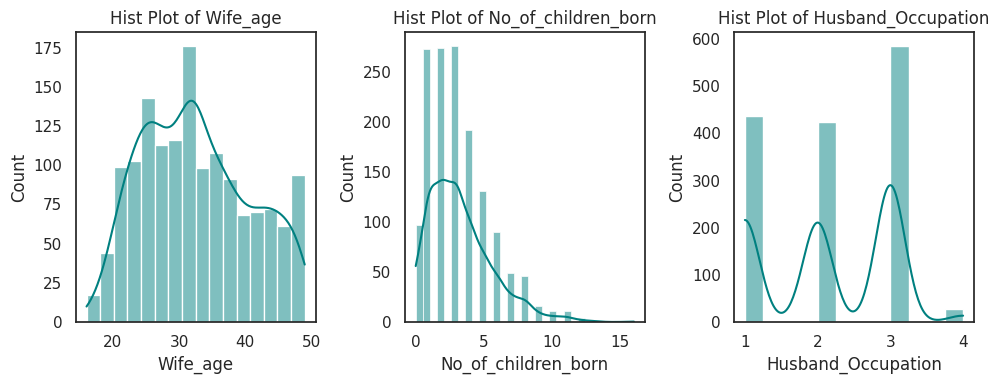

In [66]:
# Hist Plot of Num Cols
# Setting up the subplots
fig, axes = plt.subplots(nrows=1, ncols=len(num_cols2.columns), figsize=(10, 4));

for i, col in enumerate(num_cols2):
    sns.histplot(df2[col],ax=axes[i], kde=True, color='teal');
    axes[i].set_title(f'Hist Plot of {col}')
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout();

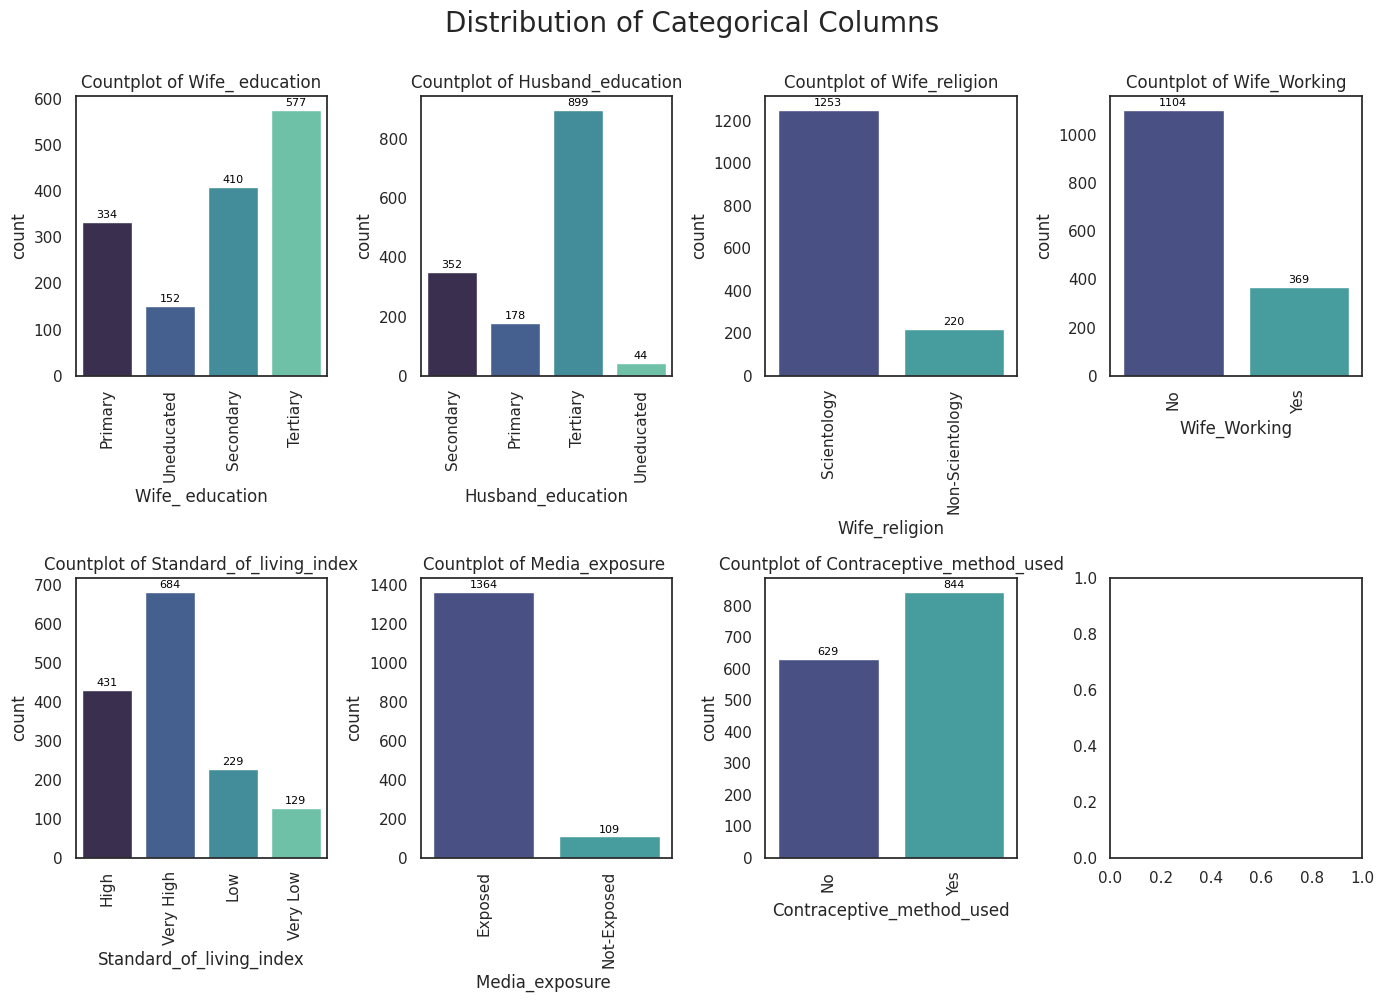

In [67]:
# Setting up the subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(14, 10))

plt.suptitle('Distribution of Categorical Columns', fontsize=20, y=1)

# Check for distribution of categorical columns
for i, col in enumerate(cat_cols2):
    ax = axes[i//4, i%4]
    sns.countplot(data=df2, x=col, ax=ax, palette='mako')
    ax.set_title(f'Countplot of {col}')
    ax.tick_params(axis='x', rotation=90)

    # Adding annotations
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()

## Bivariate Analysis

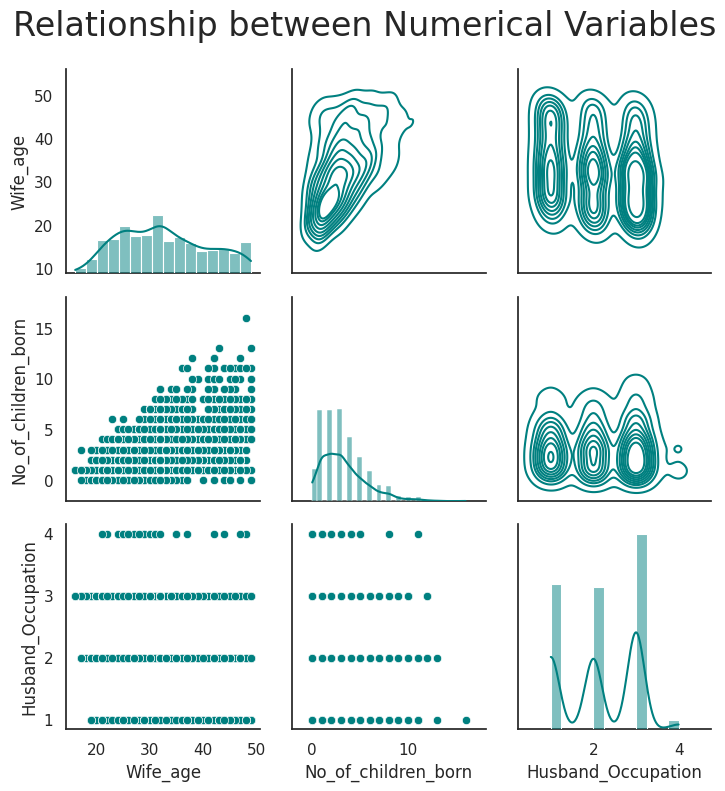

In [68]:
g = sns.PairGrid(df2)
g.map_upper(sns.kdeplot, color='teal')
g.map_lower(sns.scatterplot, color='teal')
g.map_diag(sns.histplot, color='teal', kde=True)
g.fig.suptitle('Relationship between Numerical Variables', fontsize=24, y=1.05);

In [69]:
corr_matrix = np.round(num_cols2.corr(),2)
corr_matrix

,Wife_age,No_of_children_born,Husband_Occupation
Wife_age,1.00,0.53,-0.20
No_of_children_born,0.53,1.00,-0.02
Husband_Occupation,-0.20,-0.02,1.00


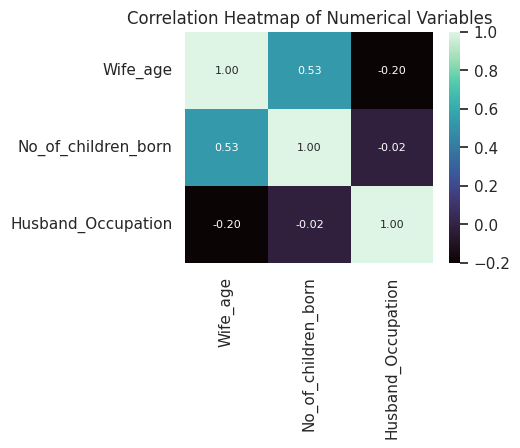

In [70]:
# Correlation matrix for numerical variables
plt.figure(figsize=(4, 3));
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='mako',annot_kws={"size": 8});
plt.title('Correlation Heatmap of Numerical Variables');

In [71]:
cat_cols2.columns

Index(['Wife_ education', 'Husband_education', 'Wife_religion', 'Wife_Working',
       'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

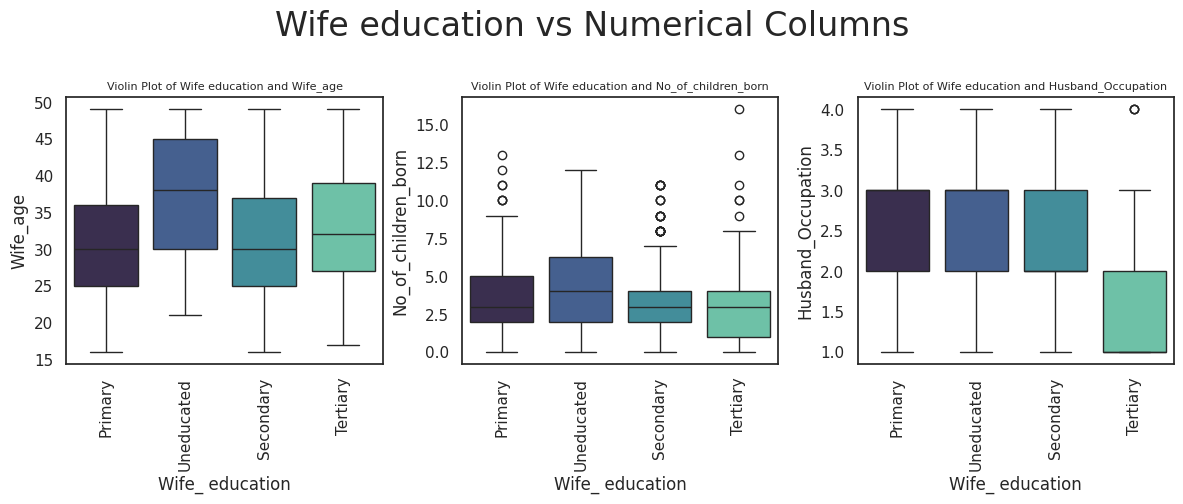

In [72]:
# Setting up the subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5));

# Bivariate analysis: Wife_ education vs Numerical variables
for i, num_col in enumerate(num_cols2):
    sns.boxplot(x='Wife_ education', y=num_col, data=df2, palette='mako',ax=axes[i])
    axes[i].set_title(f'Violin Plot of Wife education and {num_col}',fontsize=8)
    axes[i].tick_params(axis='x', rotation=90)
fig.suptitle('Wife education vs Numerical Columns', fontsize=24,y=1.005);
plt.tight_layout();

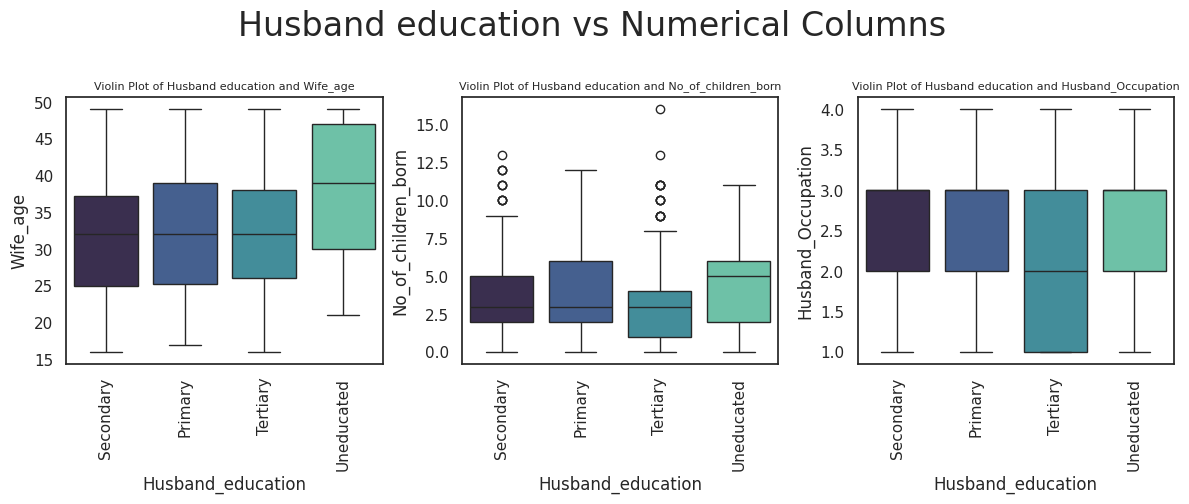

In [73]:
# Setting up the subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5));

# Bivariate analysis: Husband_education vs Numerical variables
for i, num_col in enumerate(num_cols2):
    sns.boxplot(x='Husband_education', y=num_col, data=df2, palette='mako',ax=axes[i])
    axes[i].set_title(f'Violin Plot of Husband education and {num_col}',fontsize=8)
    axes[i].tick_params(axis='x', rotation=90)
fig.suptitle('Husband education vs Numerical Columns', fontsize=24,y=1.005);
plt.tight_layout();

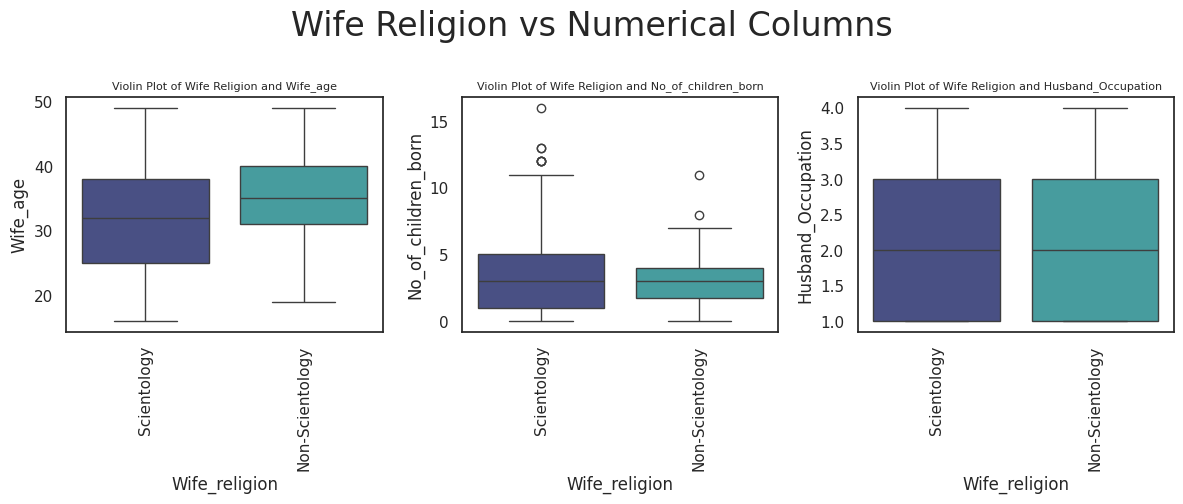

In [74]:
# Setting up the subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5));

# Bivariate analysis: Wife_religion vs Numerical variables
for i, num_col in enumerate(num_cols2):
    sns.boxplot(x='Wife_religion', y=num_col, data=df2, palette='mako',ax=axes[i])
    axes[i].set_title(f'Violin Plot of Wife Religion and {num_col}',fontsize=8)
    axes[i].tick_params(axis='x', rotation=90)
fig.suptitle('Wife Religion vs Numerical Columns', fontsize=24,y=1.005);
plt.tight_layout();

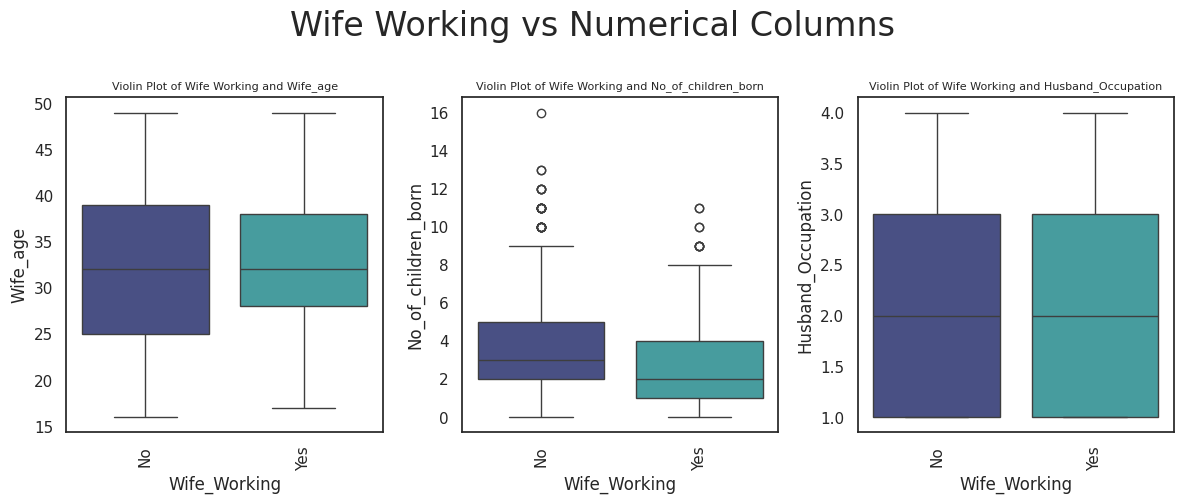

In [75]:
# Setting up the subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5));

# Bivariate analysis: Wife Working vs Numerical variables
for i, num_col in enumerate(num_cols2):
    sns.boxplot(x='Wife_Working', y=num_col, data=df2, palette='mako',ax=axes[i])
    axes[i].set_title(f'Violin Plot of Wife Working and {num_col}',fontsize=8)
    axes[i].tick_params(axis='x', rotation=90)
fig.suptitle('Wife Working vs Numerical Columns', fontsize=24,y=1.005);
plt.tight_layout();

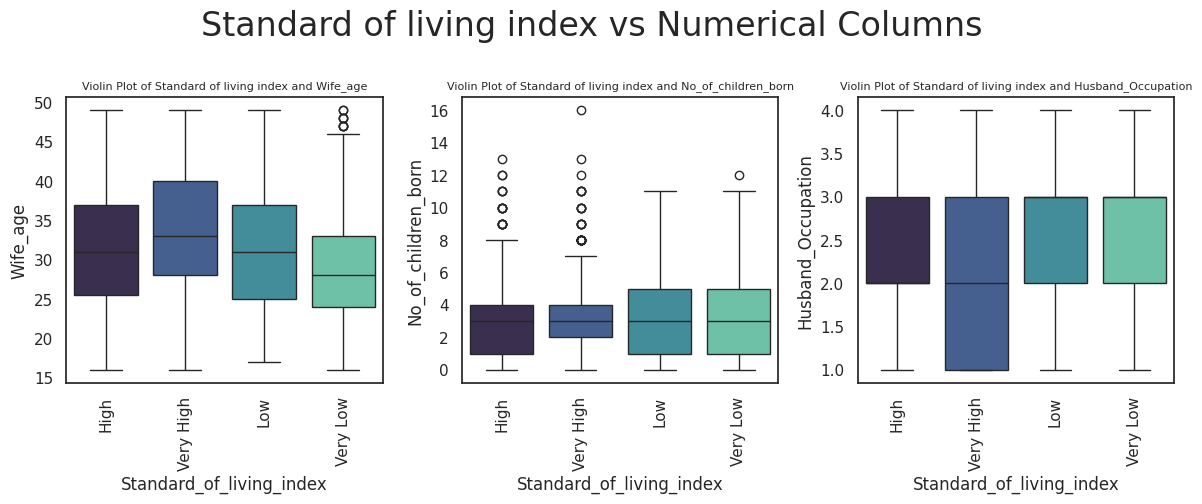

In [76]:
# Setting up the subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5));

# Bivariate analysis: Standard_of_living_index vs Numerical variables
for i, num_col in enumerate(num_cols2):
    sns.boxplot(x='Standard_of_living_index', y=num_col, data=df2, palette='mako',ax=axes[i])
    axes[i].set_title(f'Violin Plot of Standard of living index and {num_col}',fontsize=8)
    axes[i].tick_params(axis='x', rotation=90)
fig.suptitle('Standard of living index vs Numerical Columns', fontsize=24,y=1.005);
plt.tight_layout();

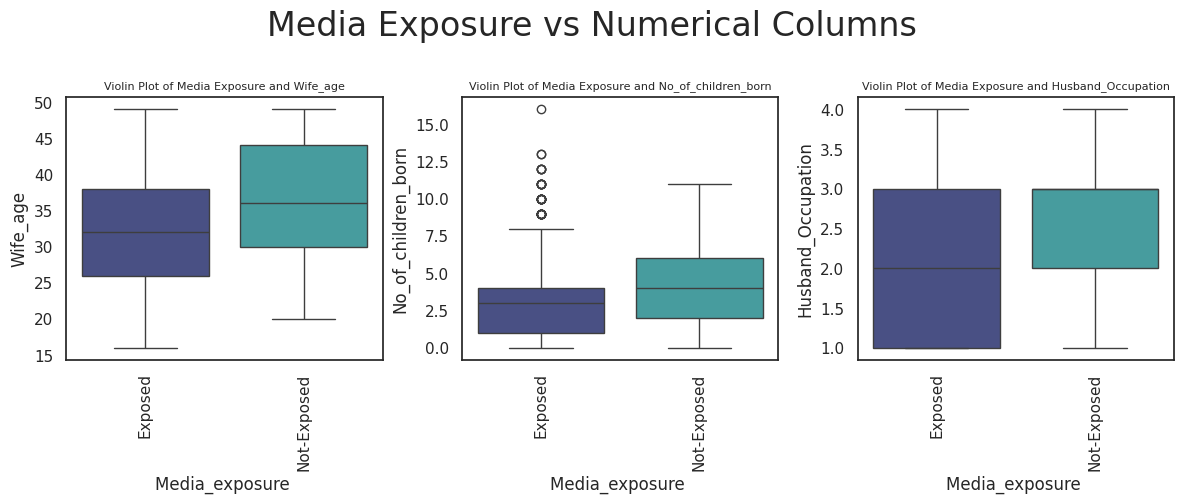

In [77]:
# Setting up the subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5));

# Bivariate analysis: Media_exposure vs Numerical variables
for i, num_col in enumerate(num_cols2):
    sns.boxplot(x='Media_exposure ', y=num_col, data=df2, palette='mako',ax=axes[i])
    axes[i].set_title(f'Violin Plot of Media Exposure and {num_col}',fontsize=8)
    axes[i].tick_params(axis='x', rotation=90)
fig.suptitle('Media Exposure vs Numerical Columns', fontsize=24,y=1.005);
plt.tight_layout();

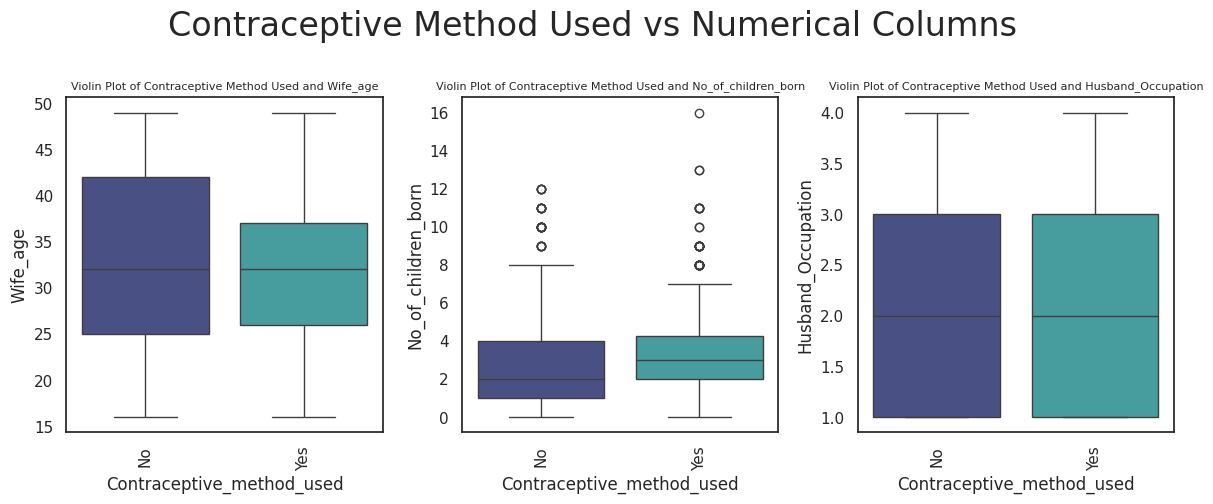

In [78]:
# Setting up the subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5));

# Bivariate analysis: Contraceptive_method_used vs Numerical variables
for i, num_col in enumerate(num_cols2):
    sns.boxplot(x='Contraceptive_method_used', y=num_col, data=df2, palette='mako',ax=axes[i])
    axes[i].set_title(f'Violin Plot of Contraceptive Method Used and {num_col}',fontsize=8)
    axes[i].tick_params(axis='x', rotation=90)
fig.suptitle('Contraceptive Method Used vs Numerical Columns', fontsize=24,y=1.005);
plt.tight_layout();

## Problem 2 - Data Pre-processing
#### Prepare the data for modelling: - Missing value Treatment (if needed) - Outlier Detection(treat, if needed) - Feature Engineering (if needed) - Encode the data - Train-test split

#### We have already treated the missing values using the median values before the univariate analysis and bivariate analysis. We are not going to treat outliers here as there is no huge difference between the min and max values.

In [79]:
df2.head(3)

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No


In [80]:
cat_cols2.columns

Index(['Wife_ education', 'Husband_education', 'Wife_religion', 'Wife_Working',
       'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

#### Dropping the Duplicate rows

In [81]:
duplicate_rows = df2[df2.duplicated()]

df2 = df2.drop(duplicate_rows.index)
df2.duplicated().sum()

0

In [82]:
duplicate_rows.index

Index([  79,  167,  224,  270,  299,  394,  414,  462,  492,  528,  576,  585,
        586,  622,  627,  646,  655,  682,  688,  694,  717,  720,  721,  738,
        755,  769,  790,  799,  806,  833,  852,  872,  877,  916,  919,  923,
        961,  968,  970,  971,  974,  981,  982,  984,  986,  994, 1081, 1106,
       1134, 1160, 1187, 1193, 1199, 1206, 1215, 1217, 1220, 1221, 1224, 1228,
       1238, 1239, 1246, 1260, 1263, 1264, 1268, 1270, 1278, 1280, 1285, 1318,
       1330, 1349, 1355, 1367, 1384, 1387, 1389, 1423, 1431, 1440, 1447, 1467,
       1469],
      dtype='int64')

In [83]:
logistic_df2 = df2.copy(deep=True)

for feature in logistic_df2.columns:
    if logistic_df2[feature].dtype == 'object':
        logistic_df2[feature] = pd.Categorical(logistic_df2[feature]).codes

logistic_df2.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,0,1,3.0,1,0,2,0,0,0
1,45.0,3,1,10.0,1,0,3,2,0,0
2,43.0,0,1,7.0,1,0,3,2,0,0
3,42.0,1,0,9.0,1,0,3,0,0,0
4,36.0,1,1,8.0,1,0,3,1,0,0


#### We will now split the data into train and test using Train Test Split

In [84]:
X_logistic = logistic_df2.drop('Contraceptive_method_used', axis = 1)
y_logistic = logistic_df2['Contraceptive_method_used']

In [85]:
X_logistic.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure '],
      dtype='object')

In [86]:
y_logistic

0       0
1       0
2       0
3       0
4       0
       ..
1466    1
1468    1
1470    1
1471    1
1472    1
Name: Contraceptive_method_used, Length: 1388, dtype: int8

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y_logistic, test_size=0.30, random_state=1)

### Problem 2 - Model Building and Compare the Performance of the Models
#### - Build a Logistic Regression model - Build a Linear Discriminant Analysis model - Build a CART model - Prune the CART model by finding the best hyperparameters using GridSearch - Check the performance of the models across train and test set using different metrics - Compare the performance of all the models built and choose the best one with proper rationale

### Logistic Regression Model

In [88]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_train_predict = logistic_model.predict(X_train)
y_test_predict = logistic_model.predict(X_test)

logistic_model_score = logistic_model.score(X_test, y_test)

print(logistic_model_score)
print('\nTrain Data:-')
print('------------')
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))
print('\nTest Data:-')
print('------------')
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.6163069544364509

Train Data:-
------------
[[191 232]
 [103 445]]
              precision    recall  f1-score   support

           0       0.65      0.45      0.53       423
           1       0.66      0.81      0.73       548

    accuracy                           0.65       971
   macro avg       0.65      0.63      0.63       971
weighted avg       0.65      0.65      0.64       971


Test Data:-
------------
[[ 79 112]
 [ 48 178]]
              precision    recall  f1-score   support

           0       0.62      0.41      0.50       191
           1       0.61      0.79      0.69       226

    accuracy                           0.62       417
   macro avg       0.62      0.60      0.59       417
weighted avg       0.62      0.62      0.60       417



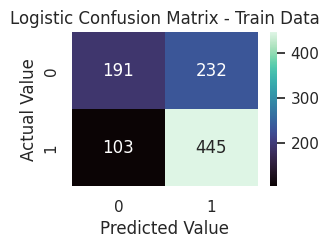

In [89]:
plt.figure(figsize=(3,2))
sns.heatmap(confusion_matrix(y_train, y_train_predict),cmap='mako',annot=True,fmt='.4g'),'\n\n'
plt.title('Logistic Confusion Matrix - Train Data')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show();

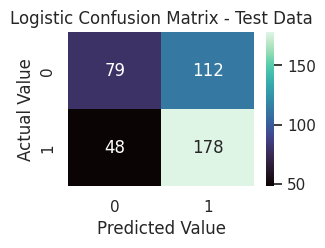

In [90]:
plt.figure(figsize=(3,2))
sns.heatmap(confusion_matrix(y_test, y_test_predict),cmap='mako',annot=True,fmt='.4g'),'\n\n'
plt.title('Logistic Confusion Matrix - Test Data')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show();

AUC: 0.679


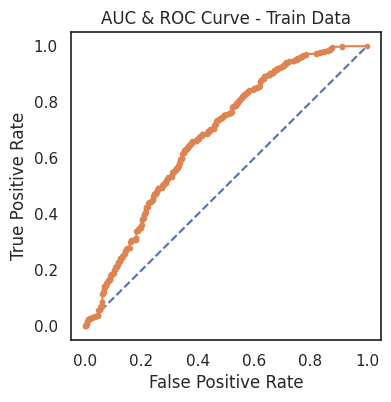

In [91]:
# predict probabilities
probs = logistic_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.figure(figsize=(4,4))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('AUC & ROC Curve - Train Data')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# show the plot
plt.show()

AUC: 0.640


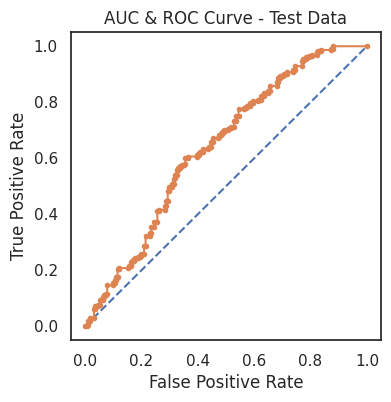

In [92]:
# predict probabilities
probs = logistic_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.figure(figsize=(4,4))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('AUC & ROC Curve - Test Data')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# show the plot
plt.show()

### LDA Model

In [93]:
df2.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [94]:
for i in cat_cols2:
    print('\n',df2[i].value_counts())


 Wife_ education
Tertiary      510
Secondary     398
Primary       330
Uneducated    150
Name: count, dtype: int64

 Husband_education
Tertiary      822
Secondary     347
Primary       175
Uneducated     44
Name: count, dtype: int64

 Wife_religion
Scientology        1182
Non-Scientology     206
Name: count, dtype: int64

 Wife_Working
No     1040
Yes     348
Name: count, dtype: int64

 Standard_of_living_index
Very High    613
High         419
Low          227
Very Low     129
Name: count, dtype: int64

 Media_exposure 
Exposed        1279
Not-Exposed     109
Name: count, dtype: int64

 Contraceptive_method_used
Yes    774
No     614
Name: count, dtype: int64


In [95]:
lda_df2 = df2.copy(deep=True)

for feature in lda_df2.columns:
    if lda_df2[feature].dtype == 'object':
        lda_df2[feature] = pd.Categorical(lda_df2[feature]).codes

lda_df2.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,0,1,3.0,1,0,2,0,0,0
1,45.0,3,1,10.0,1,0,3,2,0,0
2,43.0,0,1,7.0,1,0,3,2,0,0
3,42.0,1,0,9.0,1,0,3,0,0,0
4,36.0,1,1,8.0,1,0,3,1,0,0


In [96]:
X_lda = lda_df2.drop('Contraceptive_method_used', axis = 1)
y_lda = lda_df2['Contraceptive_method_used']

X_train, X_test, train_labels, test_labels = train_test_split(X_lda, y_lda, test_size=.30, random_state=1)

In [97]:
lda_model = LinearDiscriminantAnalysis()
lda_model=lda_model.fit(X_train,train_labels)
lda_model

LinearDiscriminantAnalysis()

In [98]:
# Predict it
print('Train')
lda_train_pred = lda_model.predict(X_train)
confusion_matrix(train_labels, lda_train_pred)

Train


array([[189, 234],
       [104, 444]])

In [99]:
print('Test')
lda_test_pred = lda_model.predict(X_test)
confusion_matrix(test_labels, lda_test_pred)

Test


array([[ 78, 113],
       [ 46, 180]])

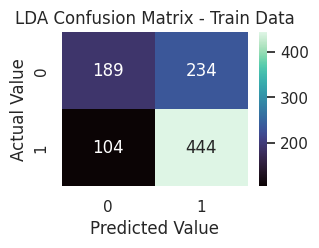

In [100]:
plt.figure(figsize=(3,2))
sns.heatmap(confusion_matrix(train_labels, lda_train_pred),cmap='mako',annot=True,fmt='.4g'),'\n\n'
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.title('LDA Confusion Matrix - Train Data')
plt.show();

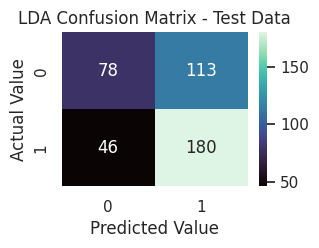

In [101]:
plt.figure(figsize=(3,2))
sns.heatmap(confusion_matrix(test_labels, lda_test_pred),cmap='mako',annot=True,fmt='.4g'),'\n\n'
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.title('LDA Confusion Matrix - Test Data')
plt.show();

In [102]:
print('Train Data')
print(classification_report(train_labels, lda_train_pred))
print('\nTest Data')
print(classification_report(test_labels, lda_test_pred))

Train Data
              precision    recall  f1-score   support

           0       0.65      0.45      0.53       423
           1       0.65      0.81      0.72       548

    accuracy                           0.65       971
   macro avg       0.65      0.63      0.63       971
weighted avg       0.65      0.65      0.64       971


Test Data
              precision    recall  f1-score   support

           0       0.63      0.41      0.50       191
           1       0.61      0.80      0.69       226

    accuracy                           0.62       417
   macro avg       0.62      0.60      0.59       417
weighted avg       0.62      0.62      0.60       417



AUC: 0.678


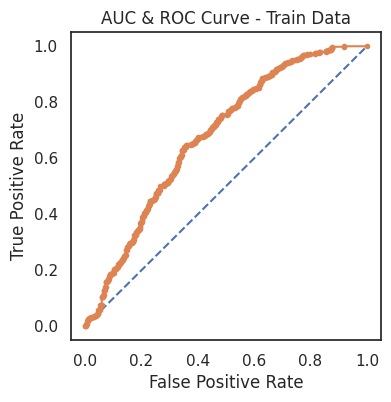

In [103]:
# predict probabilities
probs = lda_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.figure(figsize=(4,4))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('AUC & ROC Curve - Train Data')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# show the plot
plt.show()

AUC: 0.642


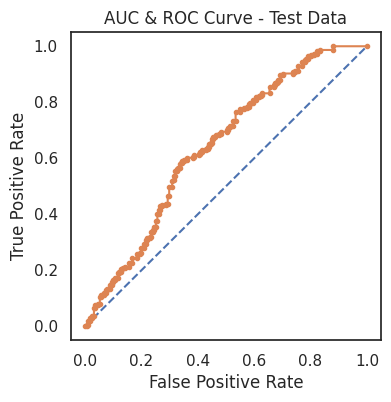

In [104]:
# predict probabilities
probs = lda_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.figure(figsize=(4,4))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('AUC & ROC Curve - Test Data')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# show the plot
plt.show()

In [105]:
lda_model.coef_

array([[-0.07559649,  0.14331608,  0.19005244,  0.30356548, -0.77157906,
        -0.03110263, -0.05005508, -0.03859543, -0.9470303 ]])

In [106]:
lda_model.intercept_

array([2.16807356])

#### LDF for the above model will be

##### LDF=2.168+ X1*(-0.075)+ X2*(0.143) + X3*(0.190) + X4*(0.303) + X5*(-0.771) + X6*(-0.031) + X7*(-0.050) + X8*(-0.038) + X9*(-0.947)

##### So from the above equation the following things can be summarized as
##### the coeff of X4 predictor is largest in magnitude thus it helps in discriminating the target the best
##### the coeff of X9 predictor is smallest in magnitude thus it helps in discriminating the target the least.
##### all the DS can be computed for each row using the above f(x) which will aid in classification

### Classification by discriminant score

In [107]:
DS=[]
coef=[-0.07559649,  0.14331608,  0.19005244,  0.30356548, -0.77157906,
        -0.03110263, -0.05005508, -0.03859543, -0.9470303] # Coefficients
for p in range(len(X_lda)):
    s3=0
    for q in range(X_lda.shape[1]):
        s3 = s3 + (X_lda.loc[X_lda.index[p], X_lda.columns[q]] * coef[q])  # Using .loc to access elements by labels
    s3=s3+2.16807356
    DS.append(s3)

In [108]:
s1 = 0  # Counter for samples classified as 1
s2 = 0  # Counter for samples classified as 0

for i in range(len(X_lda)):
    if DS[i] >= 0:
        print("FOR Row:", i)
        print(X_lda.iloc[i, :])  # Use .iloc to access elements by integer location
        print("--> { DS:", DS[i], ">= 0 , Classify as 1}")
        print("------------------------------------------------------------------------------------------")
        s1 += 1
    else:
        print("FOR Row:", i)
        print(X_lda.iloc[i, :])  # Use .iloc to access elements by integer location
        print("--> { DS:", DS[i], "< 0 , Classify as 0}")
        print("------------------------------------------------------------------------------------------")
        s2 += 1

print("Total samples classified as 1:", s1)
print("Total samples classified as 0:", s2)


Streaming output truncated to the last 5000 lines.
Husband_Occupation           1.0
Standard_of_living_index     0.0
Media_exposure               0.0
Name: 1049, dtype: float64
--> { DS: 0.5839202699999992 >= 0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 1004
Wife_age                    34.0
Wife_ education              1.0
Husband_education            2.0
No_of_children_born          4.0
Wife_religion                1.0
Wife_Working                 0.0
Husband_Occupation           1.0
Standard_of_living_index     0.0
Media_exposure               0.0
Name: 1050, dtype: float64
--> { DS: 0.5138416400000003 >= 0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 1005
Wife_age                    36.0
Wife_ education              3.0
Husband_education            2.0
No_of_children_born          2.0
Wife_religion                1.0
Wife_Working          

In [109]:
print(s1," rows classified as 1 (Contraceptive - Yes) ")
print(s2," rows classified as 0 (Contraceptive - No) ")

971  rows classified as 1 (Contraceptive - Yes) 
417  rows classified as 0 (Contraceptive - No) 


### Classification by Probability

In [110]:
pred_prob=lda_model.predict_proba(X_lda)#Posterior Probability for each row
pred_prob[:,1]

array([0.64171547, 0.80580079, 0.55811129, ..., 0.3855511 , 0.49401709,
       0.63899094])

In [111]:
s3, s4 = 0, 0  # Counters for samples classified as class 1 and class 0

for i in range(len(pred_prob[:, 1])):
    if pred_prob[:, 1][i] >= 0.5:
        print("FOR Row:", i)
        print(X_lda.iloc[i, :])  # Use .iloc to access elements by integer location
        print("--> { prob(Y=1|X) =", pred_prob[:, 1][i], ">= 0.5 , Classify as 1 }")
        print("------------------------------------------------------------------------------------------")
        s3 += 1
    else:
        print("FOR Row:", i)
        print(X_lda.iloc[i, :])  # Use .iloc to access elements by integer location
        print("--> { prob(Y=1|X) =", pred_prob[:, 1][i], "< 0.5 , Classify as 0 }")
        print("------------------------------------------------------------------------------------------")
        s4 += 1

print("Total samples classified as 1:", s3)
print("Total samples classified as 0:", s4)


Streaming output truncated to the last 5000 lines.
Husband_Occupation           1.0
Standard_of_living_index     0.0
Media_exposure               0.0
Name: 1049, dtype: float64
--> { prob(Y=1|X) = 0.6419690087130201 >= 0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 1004
Wife_age                    34.0
Wife_ education              1.0
Husband_education            2.0
No_of_children_born          4.0
Wife_religion                1.0
Wife_Working                 0.0
Husband_Occupation           1.0
Standard_of_living_index     0.0
Media_exposure               0.0
Name: 1050, dtype: float64
--> { prob(Y=1|X) = 0.6257066505834714 >= 0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 1005
Wife_age                    36.0
Wife_ education              3.0
Husband_education            2.0
No_of_children_born          2.0
Wife_religion                

In [112]:
print(s3," rows classified as 1 (Contraceptive - Yes) ")
print(s4," rows classified as 1 (Contraceptive - No) ")

971  rows classified as 1 (Contraceptive - Yes) 
417  rows classified as 1 (Contraceptive - No) 


### CART Model

In [113]:
cart_df = df2.copy(deep=True)

for feature in cart_df.columns:
    if cart_df[feature].dtype == 'object':
        cart_df[feature] = pd.Categorical(cart_df[feature]).codes

X_cart = cart_df.drop("Contraceptive_method_used" , axis=1)
y_cart = cart_df.pop("Contraceptive_method_used")

X_train, X_test, train_labels, test_labels = train_test_split(X_cart, y_cart, test_size=.30, random_state=1)

dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [114]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [115]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('d:\credit_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()


In [116]:
print(pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                               Imp
Wife_age                  0.316996
Wife_ education           0.108505
Husband_education         0.063327
No_of_children_born       0.244854
Wife_religion             0.032110
Wife_Working              0.041482
Husband_Occupation        0.062968
Standard_of_living_index  0.106733
Media_exposure            0.023026


In [117]:
y_cart_predict = dt_model.predict(X_test)

In [118]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [1,5,10,15,20],
              'min_samples_leaf':[1,5,10,15,20],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, train_labels)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 15, 20]},
             verbose=True)

In [119]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=10, max_features='auto',
                       min_samples_leaf=20, random_state=1)

In [120]:
reg_dt_model = DecisionTreeClassifier( ccp_alpha=0.001,criterion='entropy', max_depth=15,
                       max_features='auto', random_state=1024)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=15,
                       max_features='auto', random_state=1024)

#### Generating New Tree

In [121]:
ld_tree_regularized = open('ld_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= ld_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

ld_tree_regularized.close()
dot_data

#### Variable Importance

In [122]:
print(pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                               Imp
Wife_age                  0.291877
No_of_children_born       0.255335
Standard_of_living_index  0.104884
Wife_ education           0.094903
Husband_Occupation        0.090474
Wife_Working              0.056188
Husband_education         0.054442
Wife_religion             0.030597
Media_exposure            0.021301


#### Predicting on Training and Test dataset

In [123]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (971,)
ytest_predict (417,)


#### Getting the Predicted Probabilities

In [124]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.02439024, 0.97560976],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.6       , 0.4       ],
       [1.        , 0.        ],
       [0.02439024, 0.97560976],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.05882353, 0.94117647],
       [0.        , 1.        ],
       [0.6       , 0.4       ],
       [1.        , 0.        ],
       [0.05882353, 0.94117647],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.6       , 0.4       ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.

#### AUC and ROC for the training & test data

AUC: 0.983


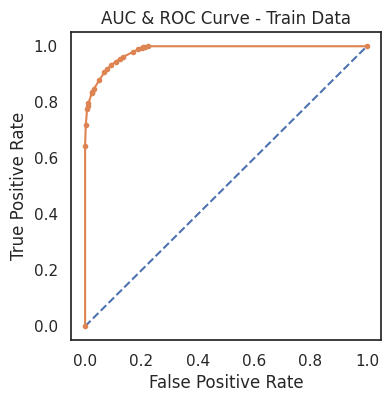

In [125]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.figure(figsize=(4,4))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('AUC & ROC Curve - Train Data')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# show the plot
plt.show()

AUC: 0.601


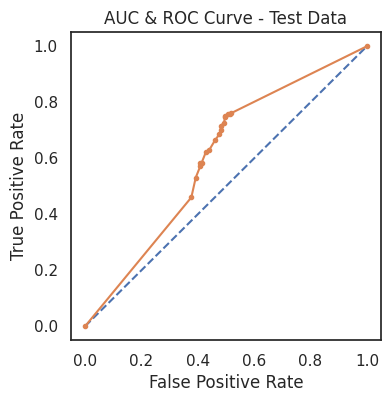

In [126]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.figure(figsize=(4,4))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('AUC & ROC Curve - Test Data')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# show the plot
plt.show()

#### Confusion Matrix for the training & test data

In [127]:
confusion_matrix(train_labels, ytrain_predict)

array([[384,  39],
       [ 37, 511]])

In [128]:
reg_dt_model.score(X_train,train_labels)

0.92173017507724

In [129]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       423
           1       0.93      0.93      0.93       548

    accuracy                           0.92       971
   macro avg       0.92      0.92      0.92       971
weighted avg       0.92      0.92      0.92       971



In [130]:
confusion_matrix(test_labels, ytest_predict)

array([[ 99,  92],
       [ 68, 158]])

In [131]:
reg_dt_model.score(X_test,test_labels)

0.6163069544364509

In [132]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.59      0.52      0.55       191
           1       0.63      0.70      0.66       226

    accuracy                           0.62       417
   macro avg       0.61      0.61      0.61       417
weighted avg       0.61      0.62      0.61       417



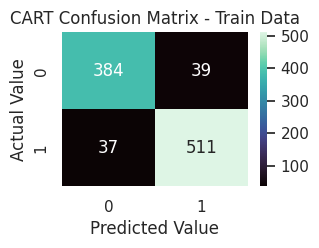

In [133]:
plt.figure(figsize=(3,2))
sns.heatmap(confusion_matrix(train_labels, ytrain_predict),cmap='mako',annot=True,fmt='.4g'),'\n\n'
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.title('CART Confusion Matrix - Train Data')
plt.show();

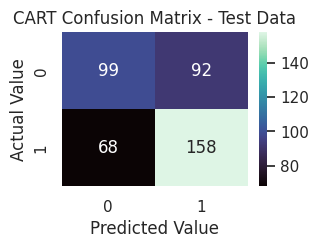

In [134]:
plt.figure(figsize=(3,2))
sns.heatmap(confusion_matrix(test_labels, ytest_predict),cmap='mako',annot=True,fmt='.4g'),'\n\n'
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.title('CART Confusion Matrix - Test Data')
plt.show();

# Thank you!